# Supervised

In [1]:

#-------------- default module --------------#
import os
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

# ------------------ side dish -------------- #

from IPython.display import HTML
from matplotlib.colors import ListedColormap

# ---------- layout & optional view ------------ #
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # able to run multiple command in 1 line

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)  # display whole numbers without +3
pd.set_option('display.float_format', '{:,.1f}'.format) # thousand separated by comma
pd.options.display.float_format = '{:,}'.format # thousand separated by comma

sns.color_palette("PuBu")
sns.set_style("whitegrid")

custom_palette = ["#1e81b0", "#e28743", "#eab676", "#76b5c5", "#abdbe3", "#063970" , "#154c79", "#1979a9"]
sns.set_palette(custom_palette)
sns.set(style="whitegrid", font_scale=1.2, palette=custom_palette)

pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
folder = '/Users/amarindraardinova/Documents/Data Scientist/Rakamin/Rakamin/04. VIX/VIX 03/week3/tugas_akhir/'

data = f"{folder}data_supervised.csv"
df = pd.read_csv(data)

In [3]:
df.info()
df.shape
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306972 entries, 0 to 306971
Data columns (total 82 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   306972 non-null  int64  
 1   TARGET                       306972 non-null  int64  
 2   NAME_CONTRACT_TYPE           306972 non-null  object 
 3   CODE_GENDER                  306972 non-null  object 
 4   FLAG_OWN_CAR                 306972 non-null  object 
 5   FLAG_OWN_REALTY              306972 non-null  object 
 6   CNT_CHILDREN                 306972 non-null  int64  
 7   AMT_INCOME_TOTAL             306972 non-null  float64
 8   AMT_CREDIT                   306972 non-null  float64
 9   AMT_ANNUITY                  306972 non-null  float64
 10  AMT_GOODS_PRICE              306972 non-null  float64
 11  NAME_TYPE_SUITE              306972 non-null  object 
 12  NAME_INCOME_TYPE             306972 non-null  object 
 13 

(306972, 82)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0         202,500.0   406,597.5     24,700.5   
1               N             0         270,000.0 1,293,502.5     35,698.5   
2               Y             0          67,500.0   135,000.0      6,750.0   
3               Y             0         135,000.0   312,682.5     29,686.5   
4               Y             0         121,500.0   513,000.0     21,865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        351,000.0   Unaccompanied          Working   
1      1,129,500.0          Family    State servant   
2        135,000.0   Unaccompanied          Working   
3        297,000.0   Unaccompanied          Working   
4        513,000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637            3,648.0   
1          0.0035409999999999       16765           1188            1,186.0   
2                    0.010032       19046            225            4,260.0   
3                    0.008019       19005           3039            9,833.0   
4                    0.028663       19932           3038            4,311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120          0.0           1               1                0   
1              291          0.0           1               1                0   
2             2531         26.0           1               1                1   
3             2437          0.0           1               1                0   
4             3458          0.0           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

# Function

In [4]:
 def summary(df):
        summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
        summary_df['missing#'] = df.isna().sum()
        summary_df['missing%'] = round((df.isna().sum()) / len(df), 2)
        summary_df['duplicated#'] = df.duplicated().sum()
        summary_df['duplicated%'] = (df.duplicated().sum()) / len(df)
        summary_df['uniques'] = df.nunique().values
        summary_df['count'] = df.count().values
        summary_df['unique'] = [df[col].unique()[:4] for col in df.columns]
        summary_df['mode'] = df.mode().transpose().iloc[:, 0].values
 
     # Merge numerical summary information
        numerical_cols = df.select_dtypes(include=['number']).columns
        numerical_summary_df = pd.DataFrame({
            'Mean': df[numerical_cols].mean(),
            'Median': df[numerical_cols].median()
        })
     
        summary_df = summary_df.merge(numerical_summary_df, left_index=True, right_index=True, how='left')
 
     # Apply background gradient to the summary DataFrame
        style = summary_df.style.background_gradient(cmap='Blues')
     
        return style 

In [5]:
def plotkde(df, numerical_columns, columns_per_row=8, figsize=(15, 3), fontsize=8, fs=13):
    num_rows = len(numerical_columns) // columns_per_row + (len(numerical_columns) % columns_per_row > 0)

    fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(figsize[0], figsize[1] * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_columns):
        sns.kdeplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'KDE Plot for {col}', fontsize=fontsize)
        axes[i].tick_params(axis='x', labelsize=fontsize)
        axes[i].tick_params(axis='y', labelsize=fontsize)
        axes[i].set_xlabel(f'{col}', fontsize=fontsize)
        axes[i].set_ylabel(f'{col}', fontsize=fontsize)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle('KDE Plots for Numerical Columns', fontsize=fs, y=1.01)
    plt.tight_layout()
    plt.show()

In [6]:
def countplot_mean(data, category_column, palette='rocket', width=0.4, rotation=0, figsize=(6, 5)):
    plt.figure(figsize=figsize)

    # Plot generator
    ax = sns.countplot(x=category_column, data=data, palette=palette, width=width)

    # Mean generator
    mean_count = data[category_column].value_counts().mean()
    ax.axhline(y=mean_count, color='red', linestyle='--', label=f'Mean: {mean_count:.2f}')

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), 
                    ha='center', va='baseline', fontsize=10)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.85), fontsize=10)    
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

    plt.xticks(rotation=rotation)

    plt.title(f'Countplot of {category_column}')
    plt.show();

In [7]:
def countplot_hue_mean(data, category_column, hue_column, palette='rocket', width=0.4, rotation=0, figsize=(6, 5)):
    plt.figure(figsize=figsize)

    # Plot generator
    ax = sns.countplot(x=category_column, data=data, palette=palette, width=width, hue=hue_column)

    # Mean generator
    mean_count = data[category_column].value_counts().mean()
    ax.axhline(y=mean_count, color='red', linestyle='--', label=f'Mean: {mean_count:.2f}')

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), 
                    ha='center', va='baseline', fontsize=10)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.85), fontsize=10)  
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
    plt.xticks(rotation=rotation)

    plt.title(f'Countplot of {category_column} with Hue {hue_column}')
    plt.show();

In [8]:
def countplot2(data, unique, column, hue_column, palette='rocket'):
    plt.figure(figsize=(22, 5))

    # Plot generator
    unique_data = data[data[unique].isin(['M', 'F'])]  # Include only 'M' and 'F' for gender
    ax = sns.countplot(x=column, data=unique_data, palette=palette, hue=hue_column)

    # Mean generator
    mean_count = unique_data[column].value_counts().mean()
    ax.axhline(y=mean_count, color='red', linestyle='--', label=f'Mean: {mean_count:.2f}')

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), 
                    ha='center', va='baseline', fontsize=10)

    ax.legend(fontsize=10)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    plt.title(f'Countplot by {unique} and {column}')  # Fix: use parameter name 'unique'
    plt.show();

In [9]:
def count_target(df, target_column, category_column):
    target_0_counts = df[df[target_column] == 0][category_column].value_counts()
    target_1_counts = df[df[target_column] == 1][category_column].value_counts()

    print(f"Counts for {target_column} = 0:")
    print(target_0_counts)

    print(f"\nCounts for {target_column} = 1:")
    print(target_1_counts)


In [10]:
def count2d(df, column1, column2):
    count_2d_result = df.groupby([column1, column2]).size().unstack(fill_value=0)
    return count_2d_result

In [11]:
def count3d(df, column1, column2):
    count_2d_result = df.groupby([column1, column2]).size().unstack(fill_value=0)
    
    # Add a new column with the sum of counts for column1
    count_2d_result[f'Sum_{column1}'] = df.groupby(column1).size()

    # Add a new row with the sum of counts for column2
#    count_2d_result.loc[f'Sum_{column2}'] = df.groupby(column2).size()

    return count_2d_result

In [12]:
def count_2d_with_concat(df, column1, column2):
    # Create a new column representing the concatenation of values in column1 and column2
    df['combined'] = df[column1].astype(str) + '_' + df[column2].astype(str)

    # Use groupby to get counts for the combinations and unstack
    count_2d_result = df.groupby(['combined']).size().unstack(fill_value=0)

    # Drop the combined column if you don't need it in the final result
    df.drop(columns=['combined'], inplace=True)

    return count_2d_result

# Split Dataframe by Numerical & Objs

In [13]:
summary(df)

In [14]:
df.describe().round(2)

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count   306,972.0 306,972.0     306,972.0         306,972.0   306,972.0   
mean   278,167.53      0.08          0.42        168,837.94  599,608.53   
std    102,789.52      0.27          0.72        237,302.75  402,543.95   
min     100,002.0       0.0           0.0          25,650.0    45,000.0   
25%    189,135.75       0.0           0.0         112,500.0   270,000.0   
50%     278,191.5       0.0           0.0         148,500.0   514,867.5   
75%     367,123.5       0.0           1.0         202,500.0   808,650.0   
max     456,255.0       1.0          19.0     117,000,000.0 4,050,000.0   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count    306,972.0        306,972.0                   306,972.0   306,972.0   
mean     27,131.96       538,486.38                        0.02   16,039.15   
std      14,491.03       369,526.98                        0.01    4,363.83   
min        1,615.5         40,500.0                         0.0     7,489.0   
25%       16,564.5        238,500.0                        0.01    12,415.0   
50%       24,930.0        450,000.0                        0.02    15,753.0   
75%       34,600.5        679,500.0                        0.03    19,684.0   
max      258,025.5      4,050,000.0                        0.07    25,229.0   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
count      306,972.0          306,972.0        306,972.0    306,972.0   
mean       67,773.23           4,986.29         2,994.41         4.11   
std       139,484.16           3,523.31          1,509.3         9.01   
min              0.0                0.0              0.0          0.0   
25%            933.0            2,009.0          1,720.0          0.0   
50%          2,219.0            4,504.0          3,254.0          0.0   
75%         5,711.25            7,480.0          4,299.0          5.0   
max        365,243.0           24,672.0          7,197.0         91.0   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count   306,972.0       306,972.0        306,972.0         306,972.0   
mean          1.0            0.82              0.2               1.0   
std           0.0            0.38              0.4              0.04   
min           1.0             0.0              0.0               0.0   
25%           1.0             1.0              0.0               1.0   
50%           1.0             1.0              0.0               1.0   
75%           1.0             1.0              0.0               1.0   
max           1.0             1.0              1.0               1.0   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count   306,972.0   306,972.0        306,972.0             306,972.0   
mean         0.28        0.06             2.15                  2.05   
std          0.45        0.23             0.91                  0.51   
min           0.0         0.0              1.0                   1.0   
25%           0.0         0.0              2.0                   2.0   
50%           0.0         0.0              2.0                   2.0   
75%           1.0         0.0              3.0                   2.0   
max           1.0         1.0             20.0                   3.0   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                    306,972.0                306,972.0   
mean                          2.03                    12.06   
std                            0.5                     3.27   
min                            1.0                      0.0   
25%                            2.0                     10.0   
50%                            2.0                     12.0   
75%                            2.0                     14.0   
max                            3.0                     23.0   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                   306,97

In [15]:
twos = df.columns[df.nunique() == 2].drop('TARGET')
nums = df.select_dtypes(include=['int', 'bool', 'float', 'datetime']).columns.drop('SK_ID_CURR')
objs = df.select_dtypes(exclude=['int', 'bool', 'float', 'datetime']).columns

In [16]:
numb = set(nums) - set(twos)
numb = list(numb)


In [17]:
len(numb)
len(objs)
len(twos)

46

15

23

# Analysis

In [18]:
df[numb].info()
df[twos].info() # this must be removed from modeling
df[objs].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306972 entries, 0 to 306971
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   YEAR_CREDIT_DURATION         306972 non-null  float64
 1   OBS_60_CNT_SOCIAL_CIRCLE     306972 non-null  float64
 2   CNT_FAM_MEMBERS              306972 non-null  float64
 3   CREDIT_ANNUITY_RATIO%        306972 non-null  float64
 4   DTI%                         306972 non-null  float64
 5   YEAR_REGISTRATION            306972 non-null  float64
 6   INCOME_CREDIT_RATIO%         306972 non-null  float64
 7   EXT_SOURCE_1                 306972 non-null  float64
 8   EXT_SOURCE_3                 306972 non-null  float64
 9   CNT_CHILDREN                 306972 non-null  int64  
 10  DEF_30_CNT_SOCIAL_CIRCLE     306972 non-null  float64
 11  AMT_REQ_CREDIT_BUREAU_YEAR   306972 non-null  float64
 12  YEAR_EMPLOYMENT              306972 non-null  int64  
 13 

In [19]:
42+14

56

In [20]:
df[objs].nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
AGE_CAT                        5
INCOME_CAT                     5
CREDIT_CAT                     5
dtype: int64

## KDE, Box Plot

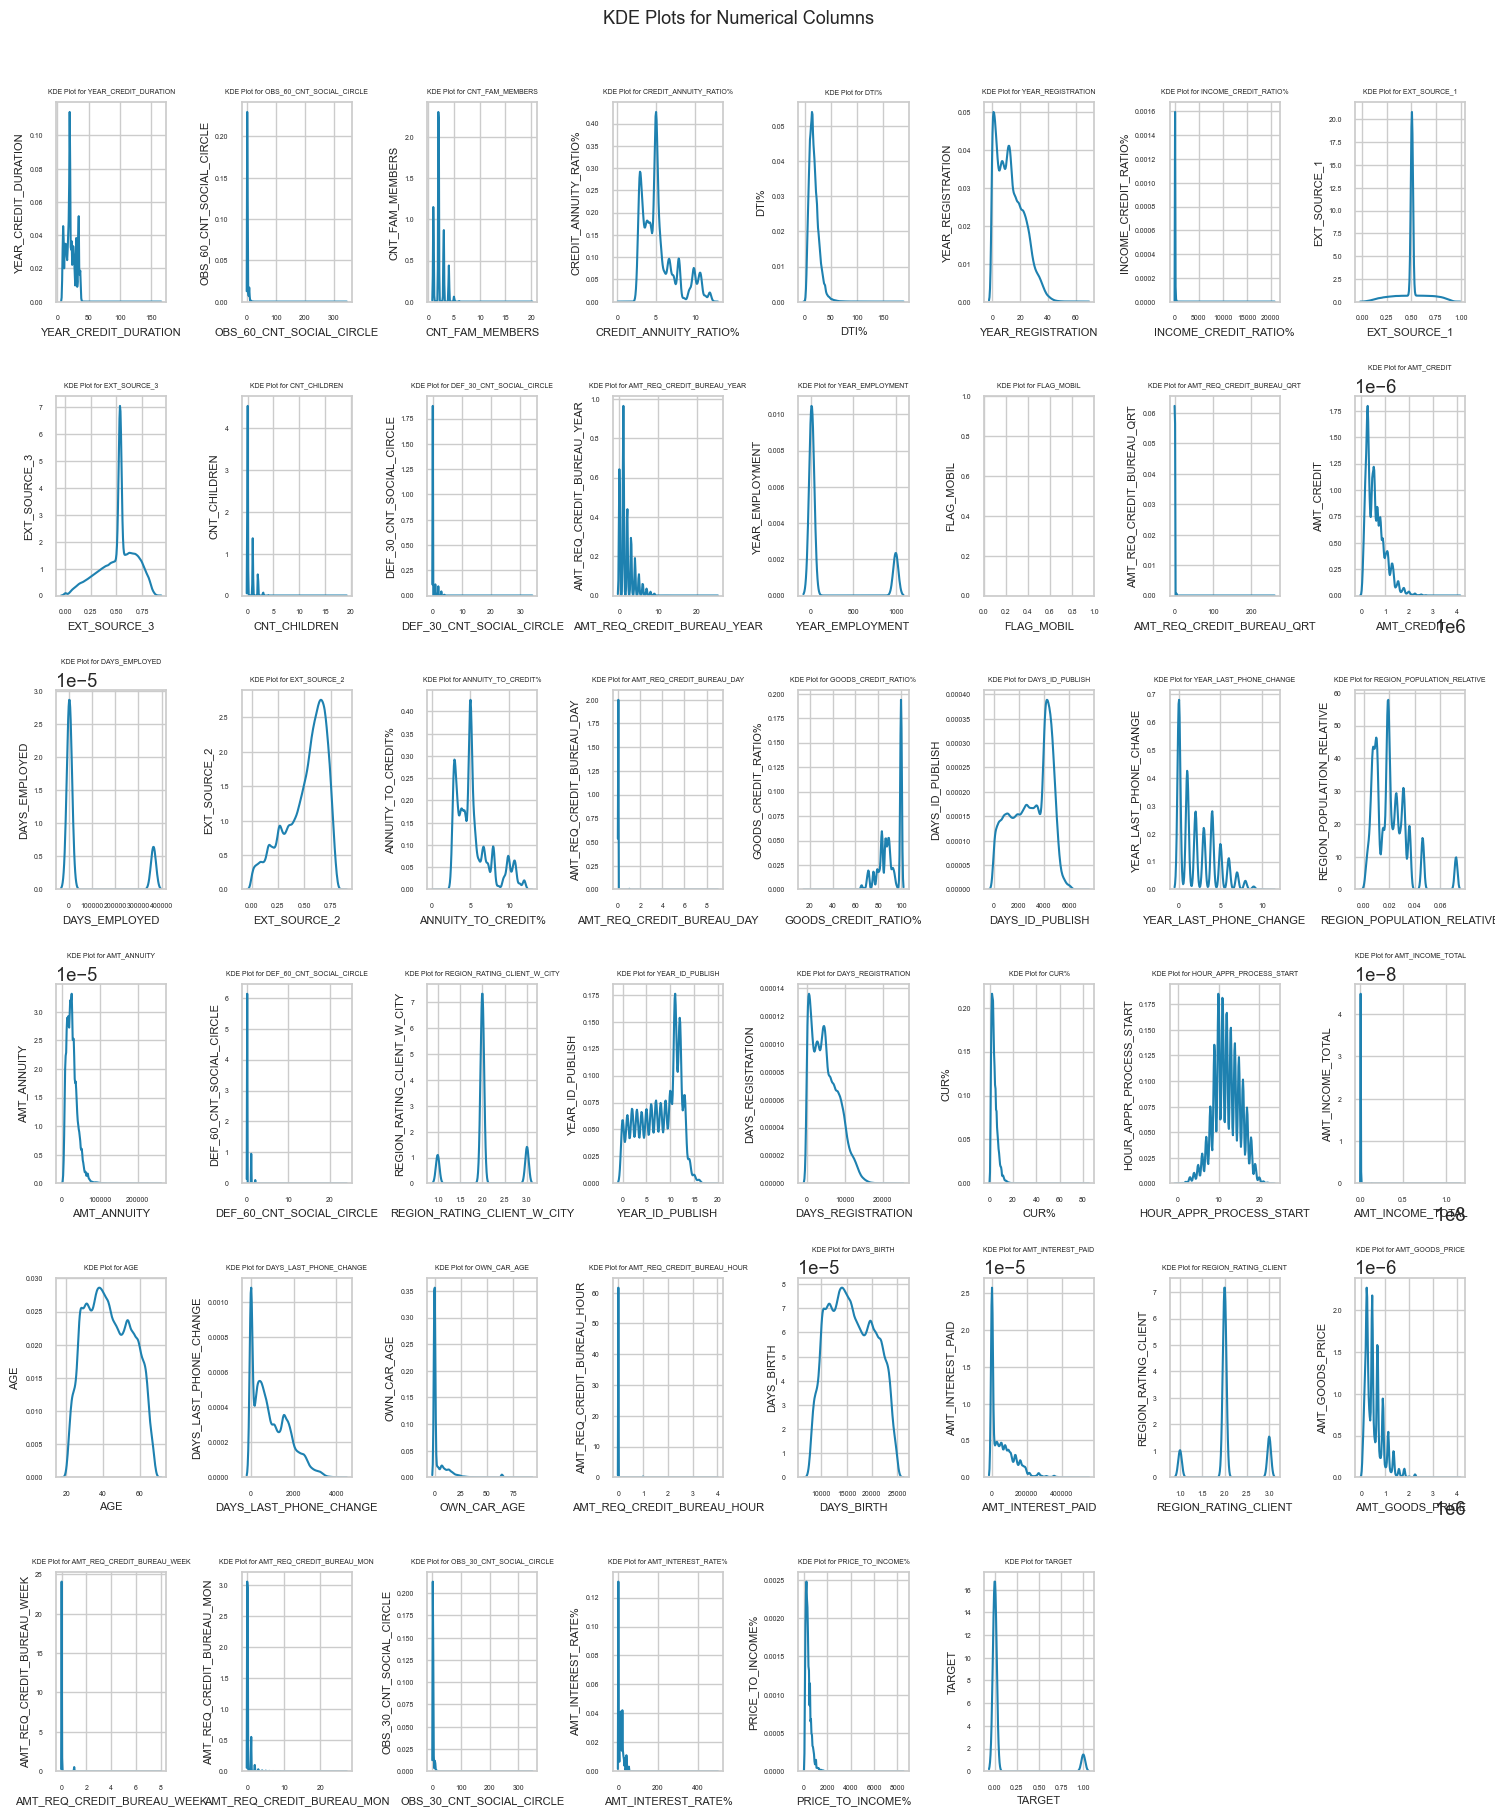

In [21]:
columns_per_row = 8

num_rows = len(numb) // columns_per_row + (len(numb) % columns_per_row > 0)

fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 3 * num_rows))

axes = axes.flatten()

for i, col in enumerate(numb):  # Corrected to iterate over numb
    sns.kdeplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'KDE Plot for {col}', fontsize=5)

    # Adjust x-axis and y-axis label size for each subplot
    axes[i].tick_params(axis='x', labelsize=5)
    axes[i].tick_params(axis='y', labelsize=5)
    
    axes[i].set_xlabel(f'{col}', fontsize=8)
    axes[i].set_ylabel(f'{col}', fontsize=8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Set the super title with adjusted fontsize
plt.suptitle('KDE Plots for Numerical Columns', fontsize=13, y=1.01)

plt.tight_layout()
plt.show();

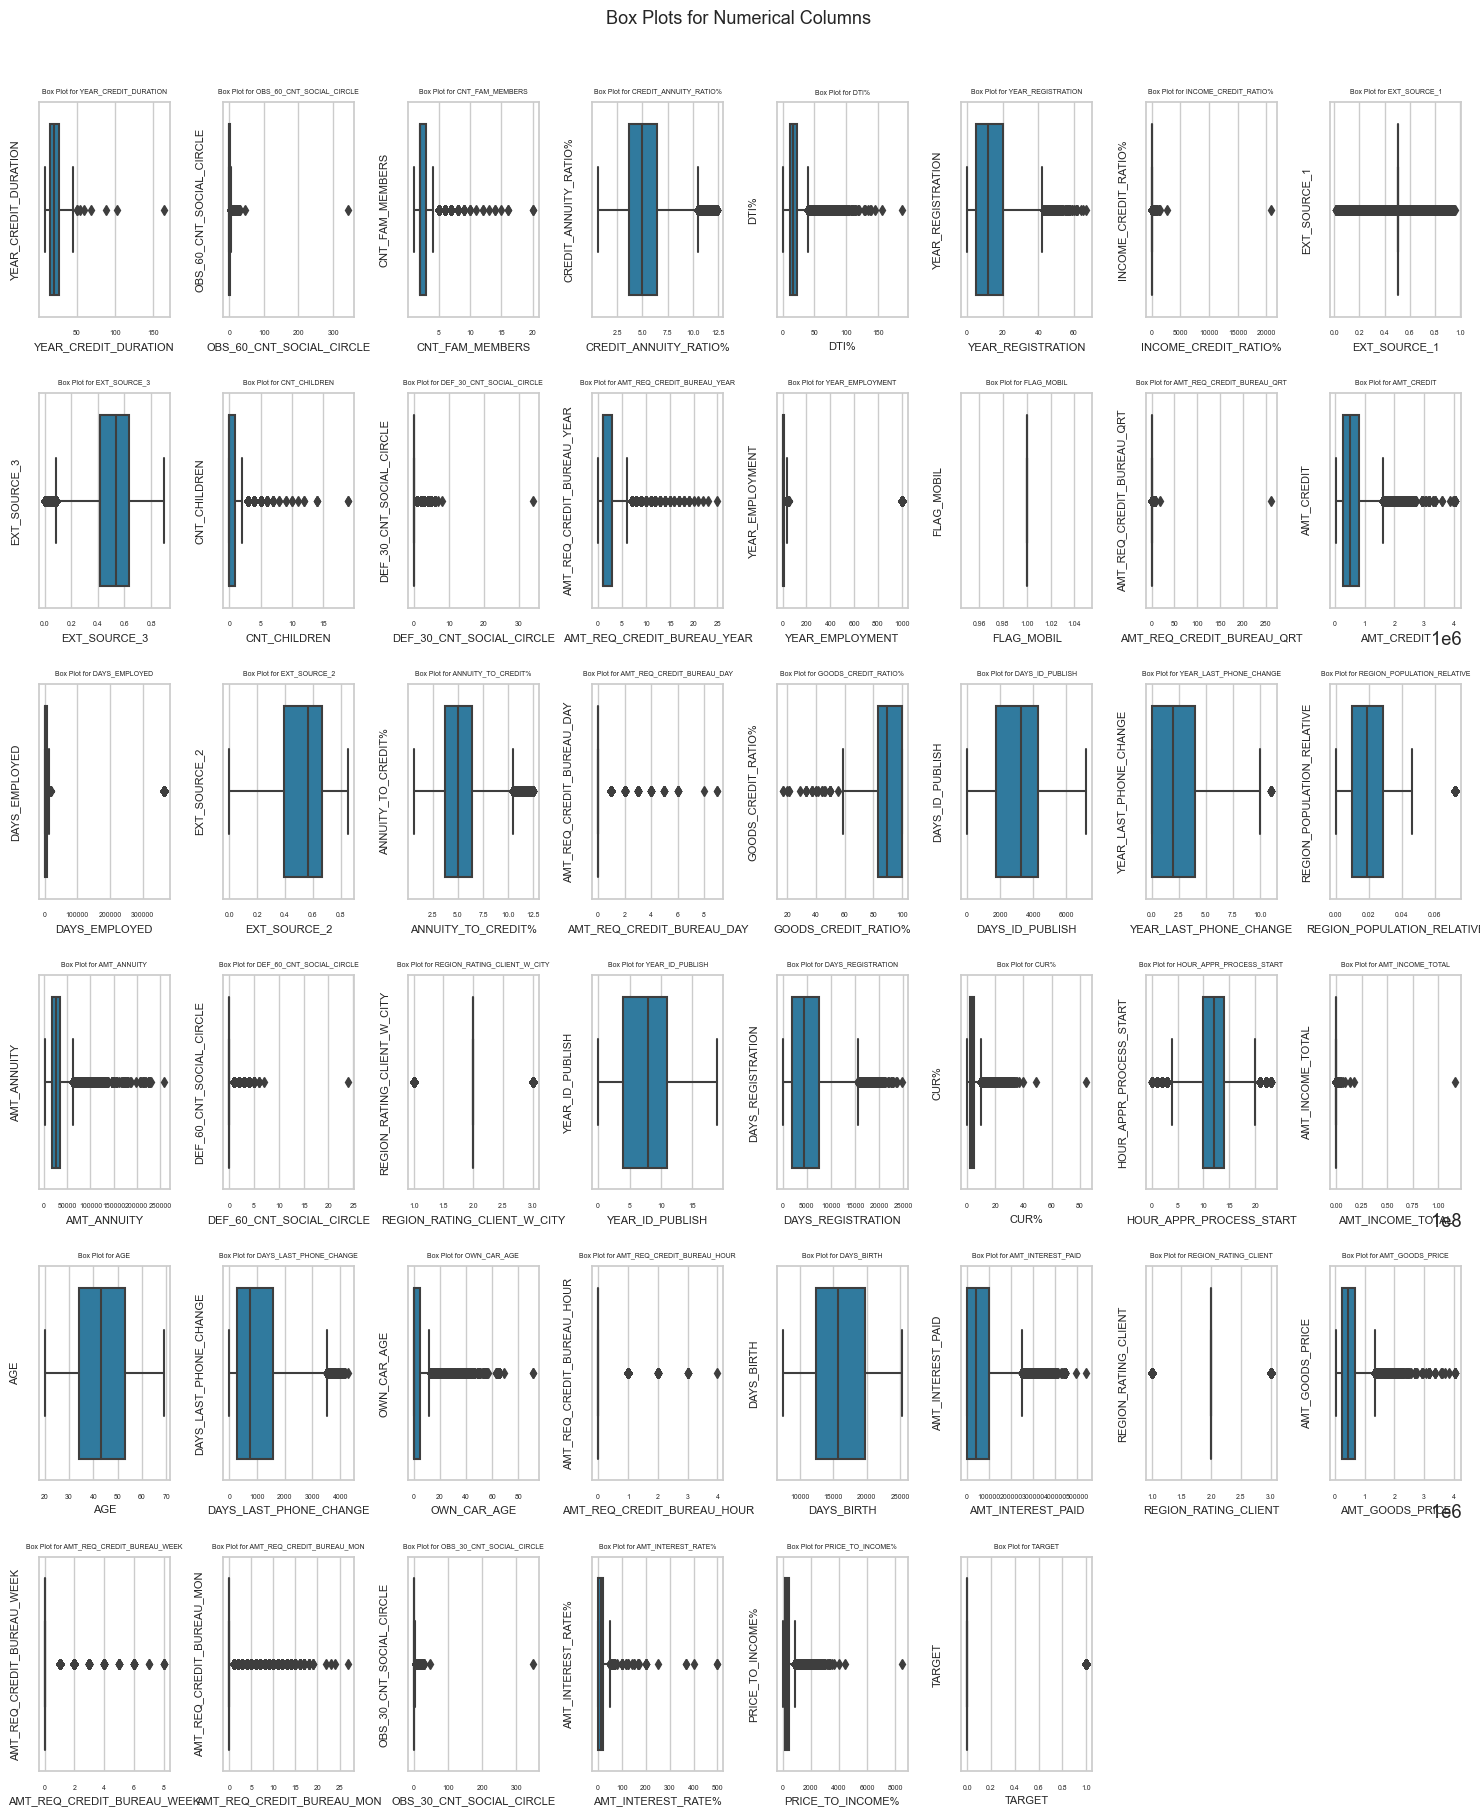

In [22]:
columns_per_row = 8

num_rows = len(numb) // columns_per_row + (len(numb) % columns_per_row > 0)

fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 3 * num_rows))

axes = axes.flatten()

for i, col in enumerate(numb):  # Corrected to iterate over numb
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Box Plot for {col}', fontsize=5)

    # Adjust x-axis and y-axis label size for each subplot
    axes[i].tick_params(axis='x', labelsize=5)
    axes[i].tick_params(axis='y', labelsize=5)
    
    axes[i].set_xlabel(f'{col}', fontsize=8)
    axes[i].set_ylabel(f'{col}', fontsize=8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Set the super title with adjusted fontsize
plt.suptitle('Box Plots for Numerical Columns', fontsize=13, y=1.01)

plt.tight_layout()
plt.show();

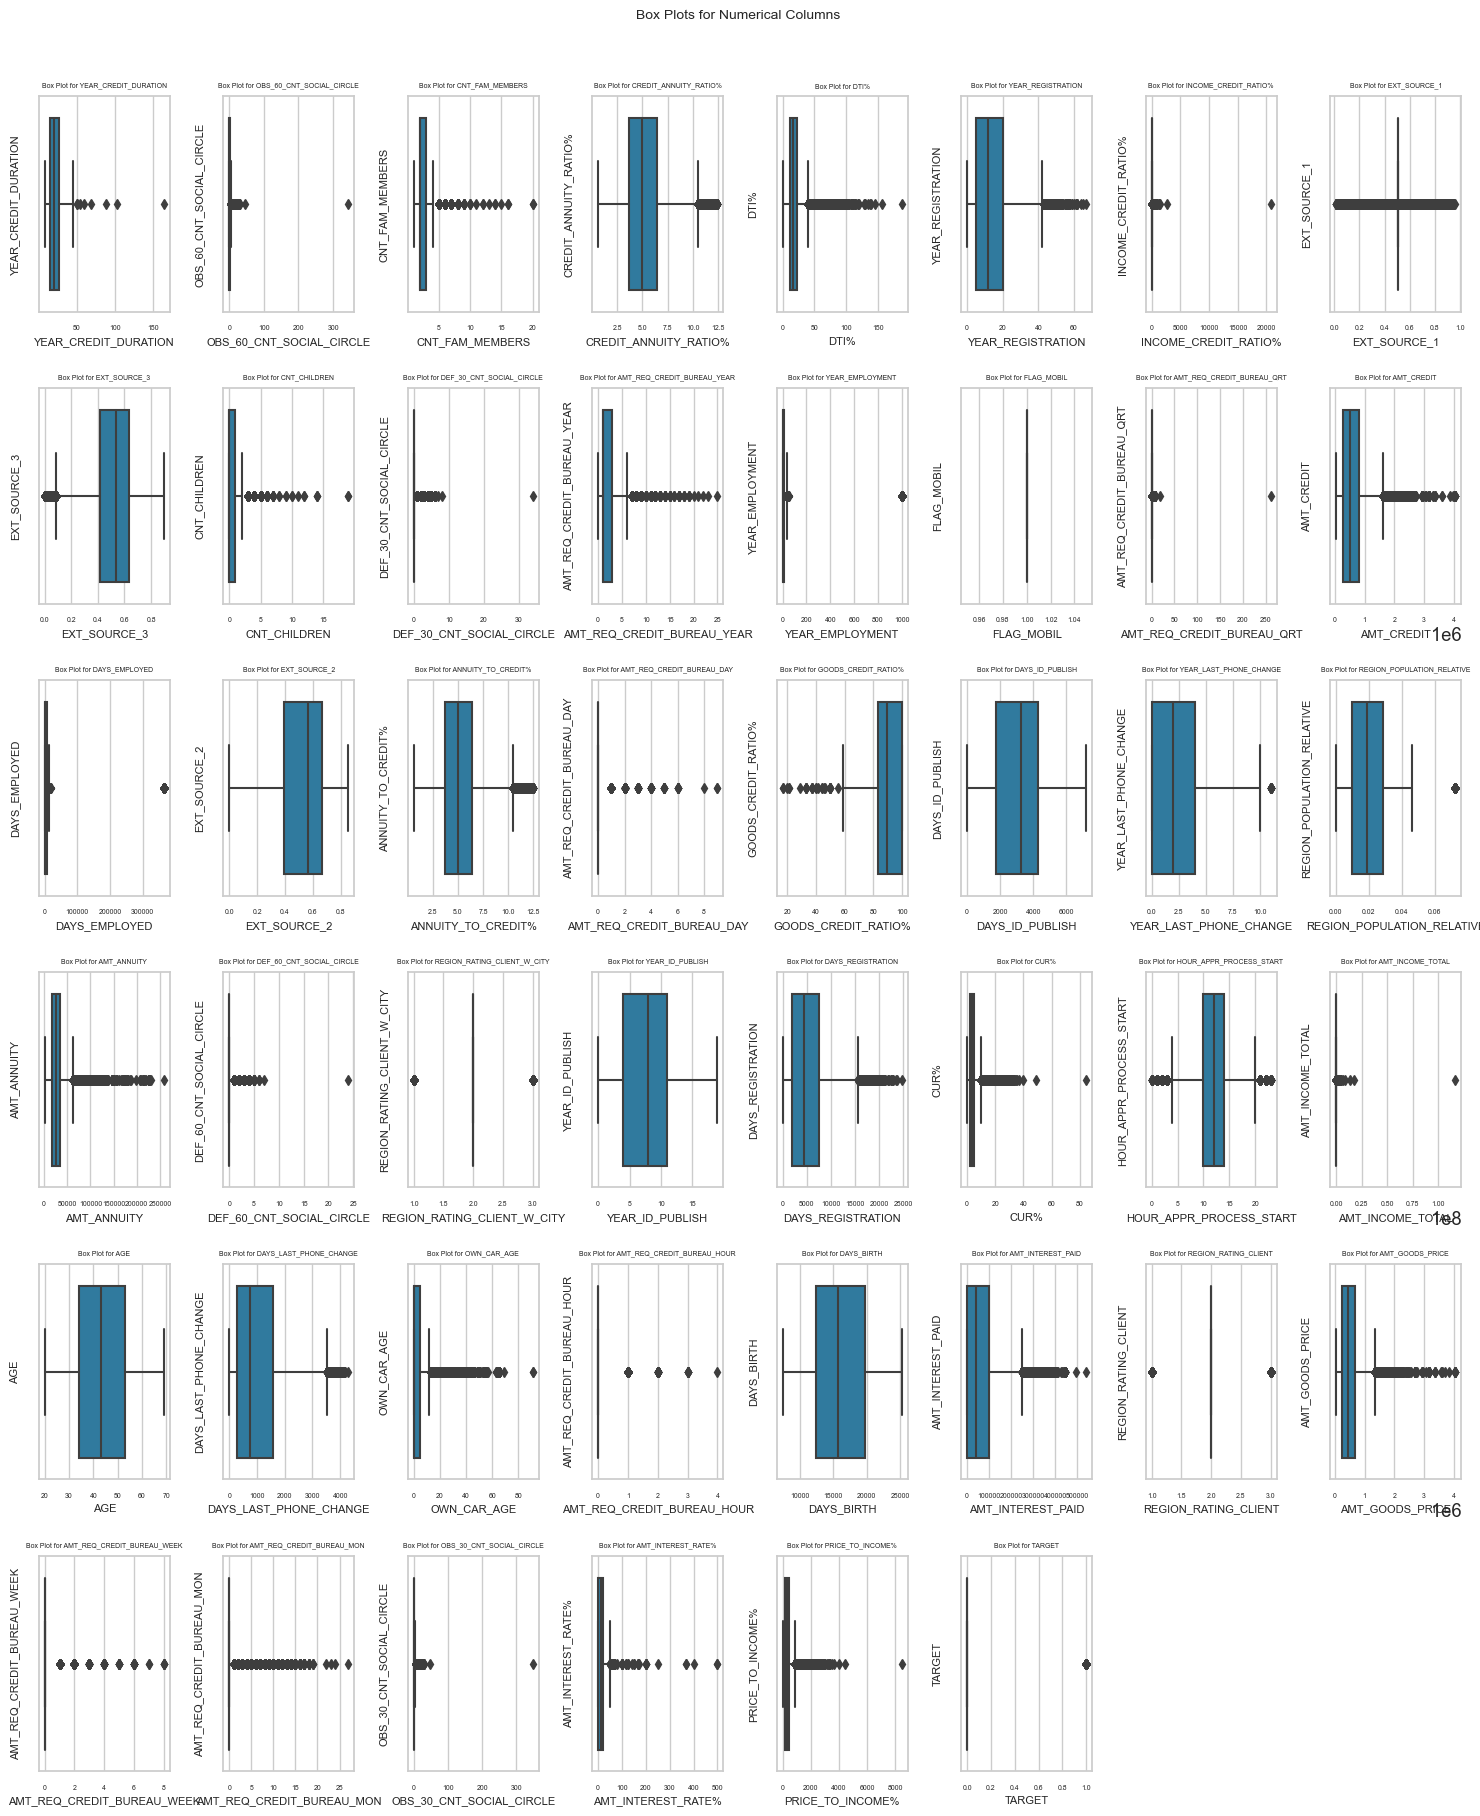

In [23]:
columns_per_row = 8

num_rows = len(numb) // columns_per_row + (len(numb) % columns_per_row > 0)

fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 3 * num_rows))

axes = axes.flatten()

for i, col in enumerate(numb):  # Corrected to iterate over numb
    sns.boxplot(data=df, x=col, hue='TARGET', ax=axes[i])
    axes[i].set_title(f'Box Plot for {col}', fontsize=5)

    # Adjust x-axis and y-axis label size for each subplot
    axes[i].tick_params(axis='x', labelsize=5)
    axes[i].tick_params(axis='y', labelsize=5)
    
    axes[i].set_xlabel(f'{col}', fontsize=8)
    axes[i].set_ylabel(f'{col}', fontsize=8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Set the super title with adjusted fontsize
plt.suptitle('Box Plots for Numerical Columns', fontsize=10, y=1.01)

plt.tight_layout()
plt.show();

## Countplot

### Name Contract Type

In [24]:
df.NAME_CONTRACT_TYPE.unique()
df.NAME_CONTRACT_TYPE.value_counts()

array(['Cash loans', 'Revolving loans'], dtype=object)

NAME_CONTRACT_TYPE
Cash loans         278231
Revolving loans     28741
Name: count, dtype: int64

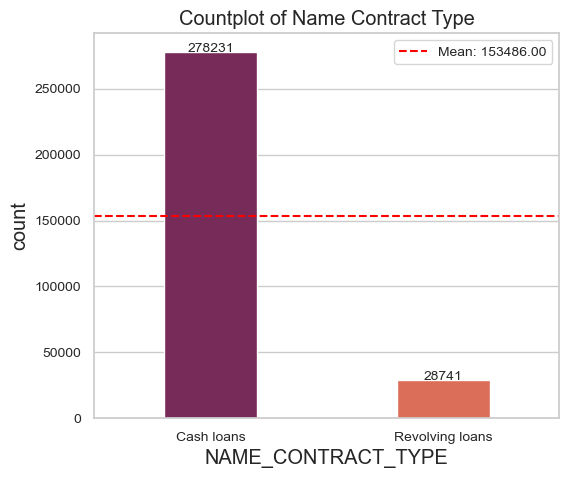

In [25]:
plt.figure(figsize=(6, 5))

# plot generator

ax = sns.countplot(x='NAME_CONTRACT_TYPE', data=df, palette='rocket', width=0.4)

# mean generator
mean_count = df['NAME_CONTRACT_TYPE'].value_counts().mean()
ax.axhline(y=mean_count, color='red', linestyle='--', label=f'Mean: {mean_count:.2f}')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), 
                ha='center', va='baseline', fontsize=10)

ax.legend(fontsize=10)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.title('Countplot of Name Contract Type')
plt.show();

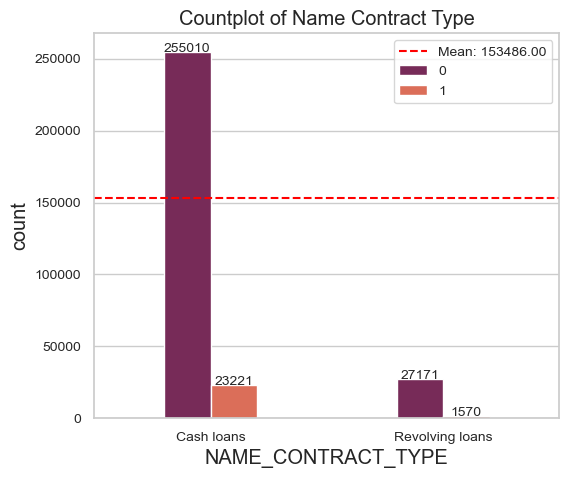

In [26]:
plt.figure(figsize=(6, 5))

# plot generator

ax = sns.countplot(x='NAME_CONTRACT_TYPE', data=df, palette='rocket', width=0.4, hue='TARGET')

# mean generator
mean_count = df['NAME_CONTRACT_TYPE'].value_counts().mean()
ax.axhline(y=mean_count, color='red', linestyle='--', label=f'Mean: {mean_count:.2f}')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), 
                ha='center', va='baseline', fontsize=10)

ax.legend(fontsize=10)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.title('Countplot of Name Contract Type')
plt.show();

### Code Gender

#### Male

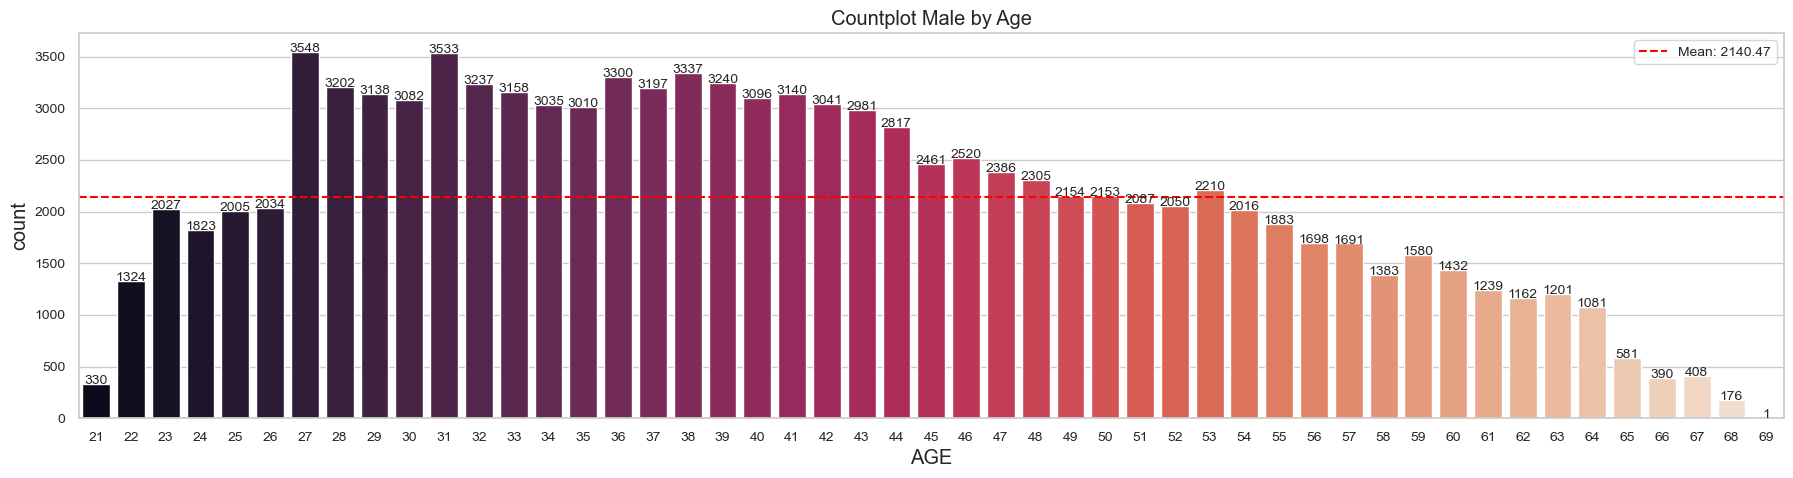

In [27]:
plt.figure(figsize=(22, 5))

# plot generator
male_data = df[df['CODE_GENDER'] == 'M']
ax = sns.countplot(x='AGE', data=male_data, palette='rocket')

# mean generator
mean_count = male_data['AGE'].value_counts().mean()
ax.axhline(y=mean_count, color='red', linestyle='--', label=f'Mean: {mean_count:.2f}')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), 
                ha='center', va='baseline', fontsize=10)

ax.legend(fontsize=10)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.title('Countplot Male by Age')
plt.show();

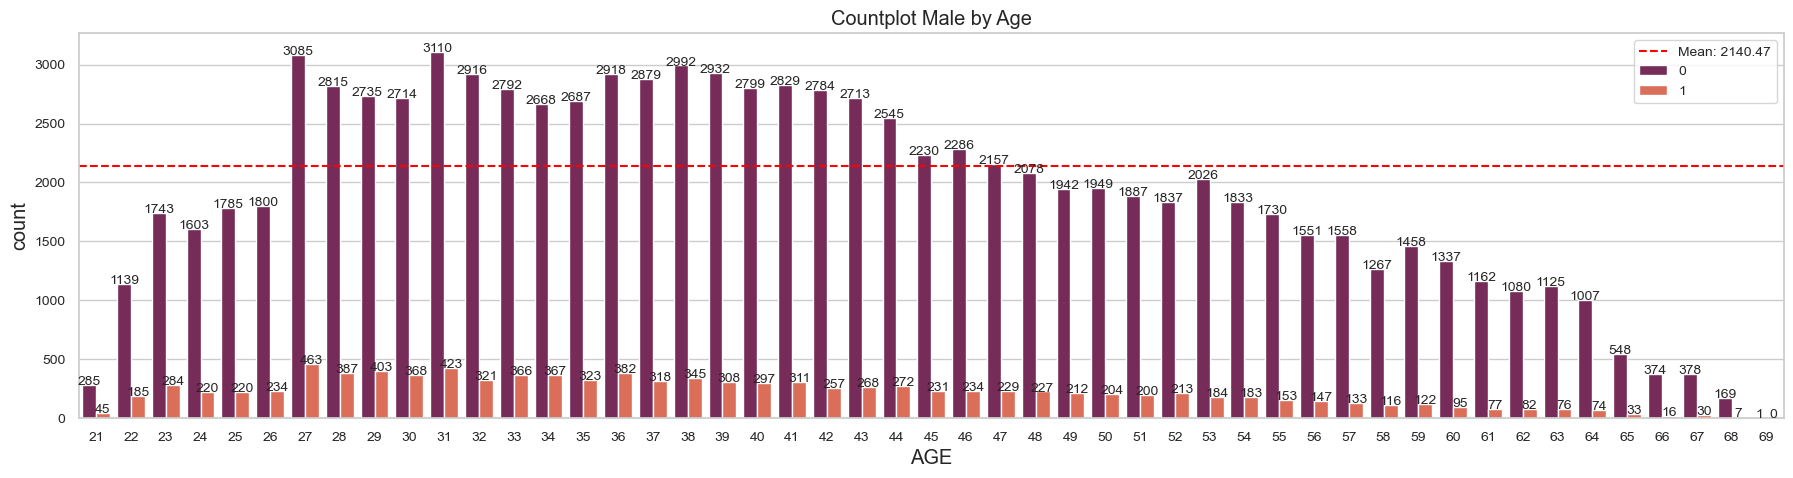

In [28]:
plt.figure(figsize=(22, 5))

# plot generator
male_data = df[df['CODE_GENDER'] == 'M']
ax = sns.countplot(x='AGE', data=male_data, palette='rocket', hue='TARGET')

# mean generator
mean_count = male_data['AGE'].value_counts().mean()
ax.axhline(y=mean_count, color='red', linestyle='--', label=f'Mean: {mean_count:.2f}')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), 
                ha='center', va='baseline', fontsize=10)

ax.legend(fontsize=10)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.title('Countplot Male by Age')
plt.show();

#### Female

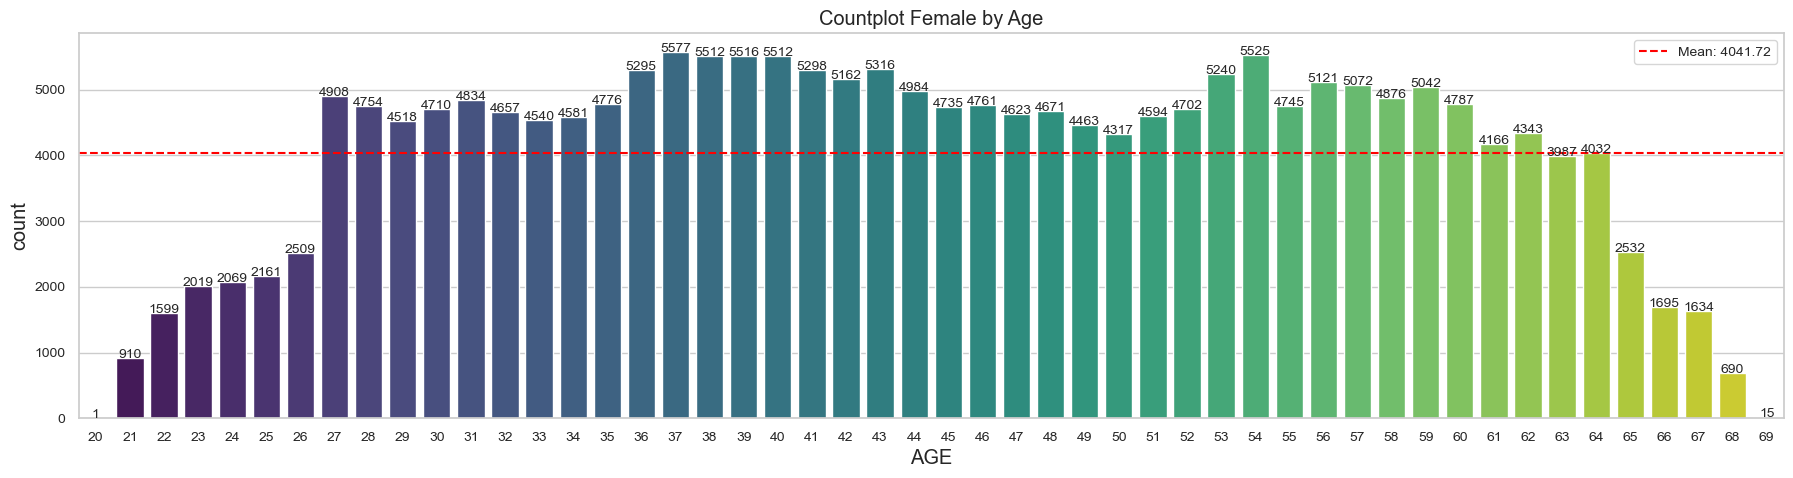

In [29]:
plt.figure(figsize=(22, 5))

# plot generator
female_data = df[df['CODE_GENDER'] == 'F']
ax = sns.countplot(x='AGE', data=female_data, palette='viridis')

# mean generator
mean_count = female_data['AGE'].value_counts().mean()
ax.axhline(y=mean_count, color='red', linestyle='--', label=f'Mean: {mean_count:.2f}')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), 
                ha='center', va='baseline', fontsize=10)

ax.legend(fontsize=10)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.title('Countplot Female by Age')
plt.show();

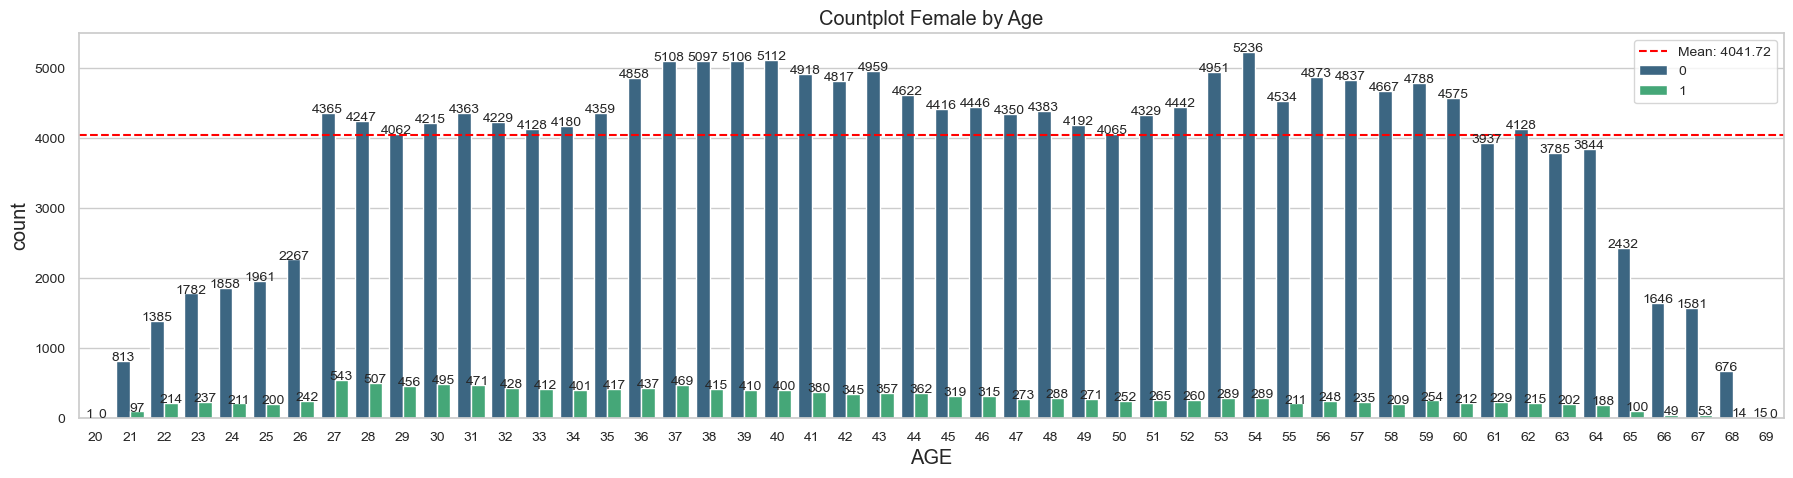

In [30]:
plt.figure(figsize=(22, 5))

# plot generator
female_data = df[df['CODE_GENDER'] == 'F']
ax = sns.countplot(x='AGE', data=female_data, palette='viridis', hue='TARGET')

# mean generator
mean_count = female_data['AGE'].value_counts().mean()
ax.axhline(y=mean_count, color='red', linestyle='--', label=f'Mean: {mean_count:.2f}')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), 
                ha='center', va='baseline', fontsize=10)

ax.legend(fontsize=10)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.title('Countplot Female by Age')
plt.show();

#### Total by Gender

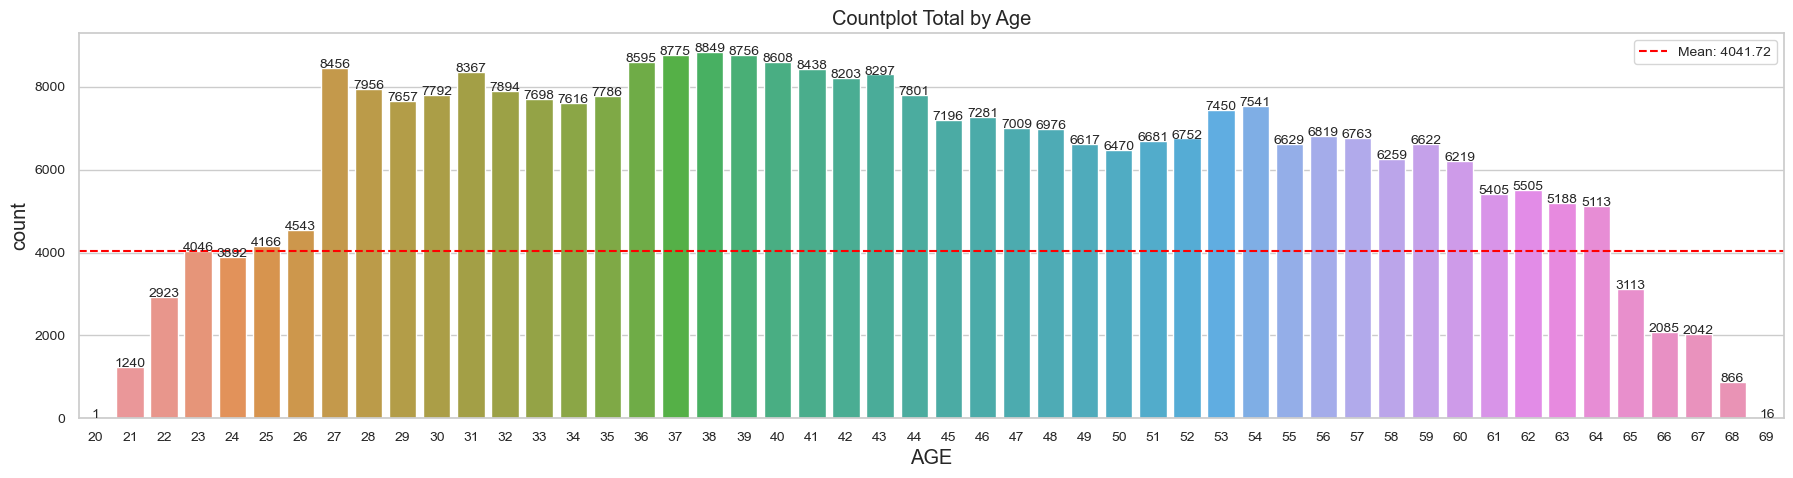

In [31]:
plt.figure(figsize=(22, 5))
ax = sns.countplot(x ='AGE', data = df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), ha='center', va='baseline', fontsize=10)

# mean generator
mean_count = female_data['AGE'].value_counts().mean()
ax.axhline(y=mean_count, color='red', linestyle='--', label=f'Mean: {mean_count:.2f}')    
    
ax.legend(fontsize=10)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.title('Countplot Total by Age')
plt.show();

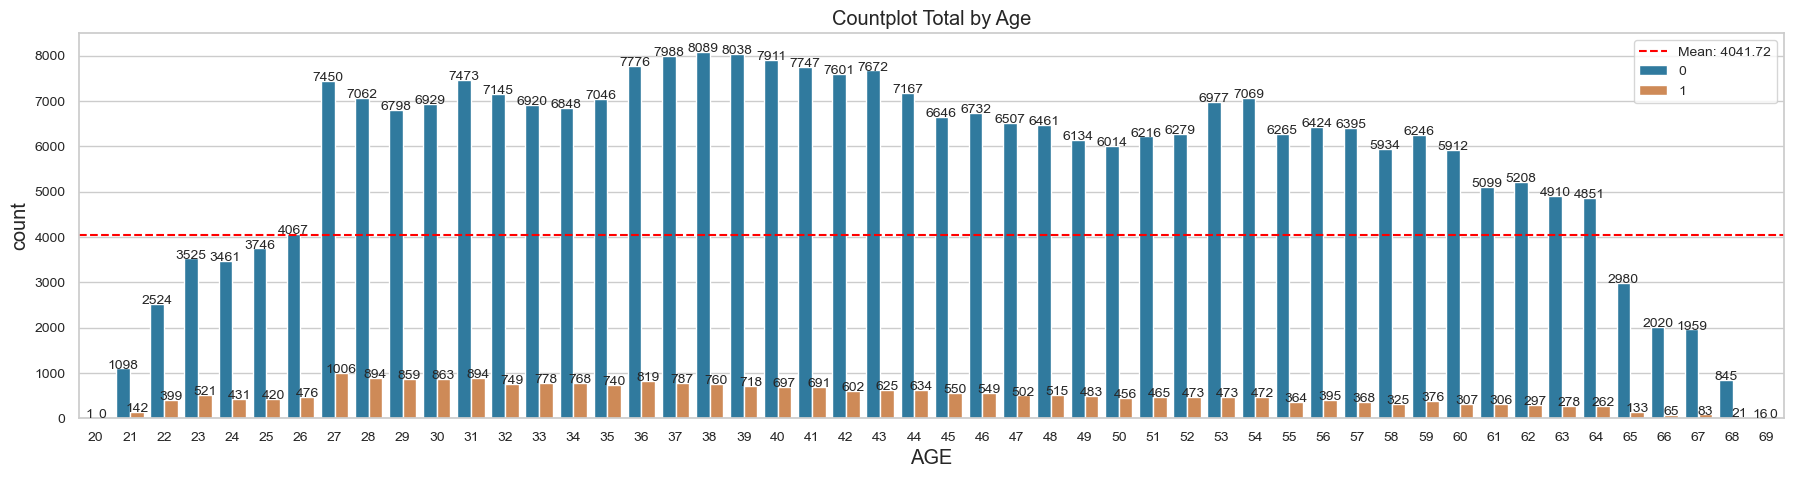

In [32]:
plt.figure(figsize=(22, 5))
ax = sns.countplot(x ='AGE', data = df, hue='TARGET')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), ha='center', va='baseline', fontsize=10)

# mean generator
mean_count = female_data['AGE'].value_counts().mean()
ax.axhline(y=mean_count, color='red', linestyle='--', label=f'Mean: {mean_count:.2f}')    
    
ax.legend(fontsize=10)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.title('Countplot Total by Age')
plt.show();

### Flag Own Car

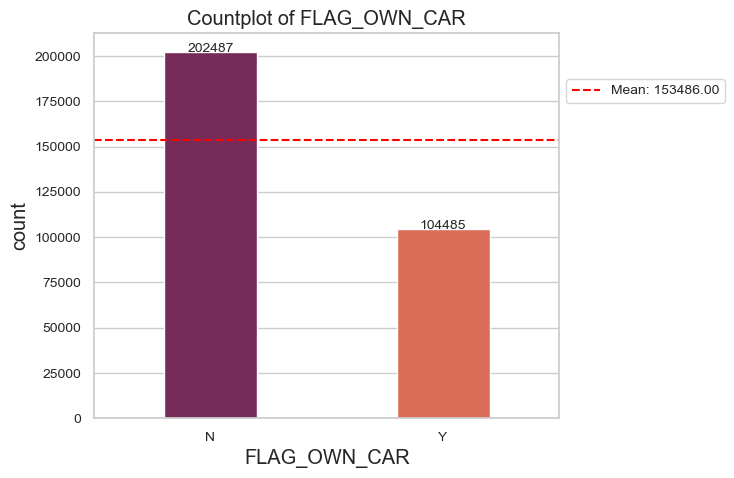

In [33]:
countplot_mean(df, 'FLAG_OWN_CAR', palette='rocket', width=0.4)

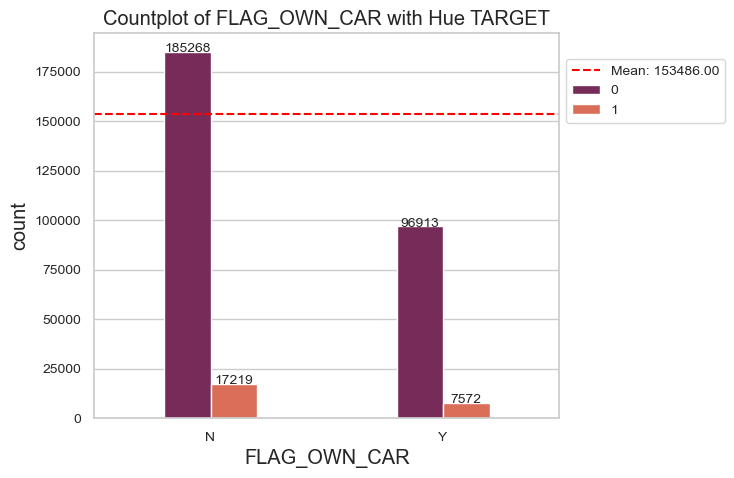

In [34]:
countplot_hue_mean(df,'FLAG_OWN_CAR', 'TARGET', palette='rocket', width=0.4)

### Flag Own Realty 

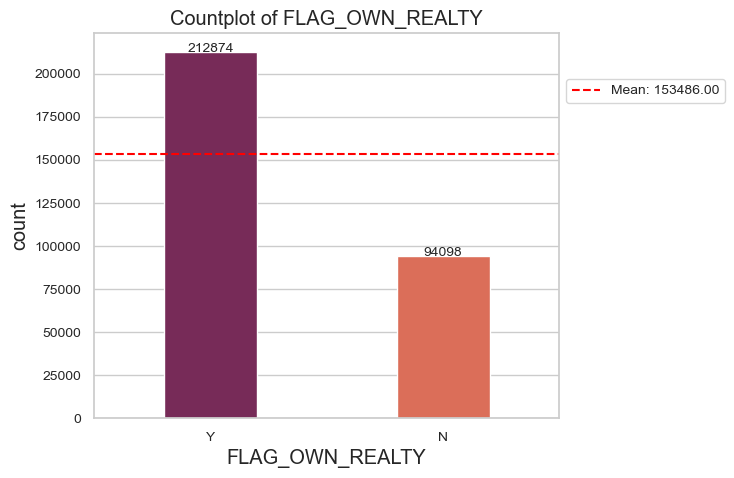

In [35]:
countplot_mean(df, 'FLAG_OWN_REALTY', palette='rocket', width=0.4, rotation=0)

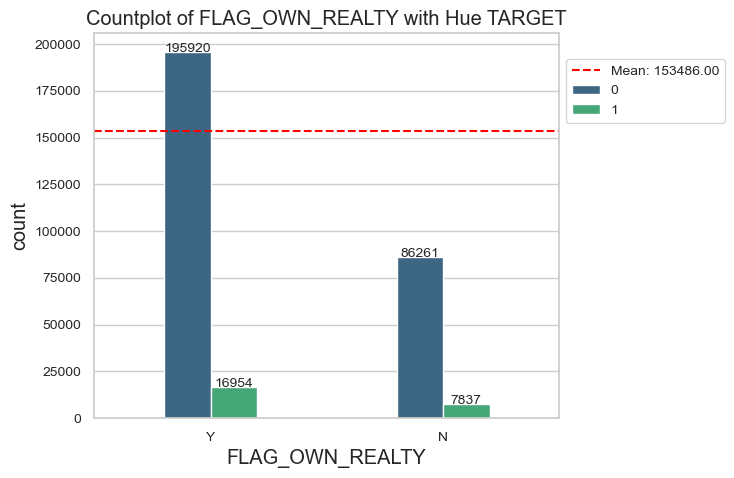

In [36]:
countplot_hue_mean(df, 'FLAG_OWN_REALTY', 'TARGET', palette='viridis', width=0.4, rotation=0)

### Name Type Suite

In [37]:
df.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', 'Other_B', 'Group of people'], dtype=object)

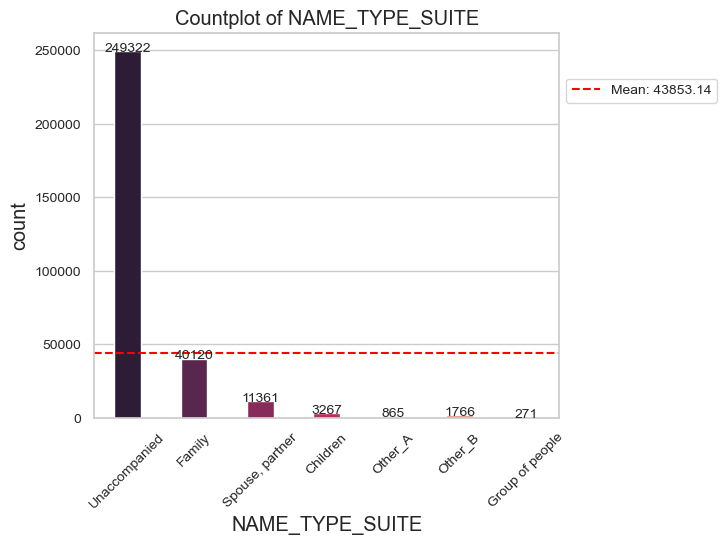

In [38]:
countplot_mean(df,'NAME_TYPE_SUITE',palette='rocket', rotation=45)

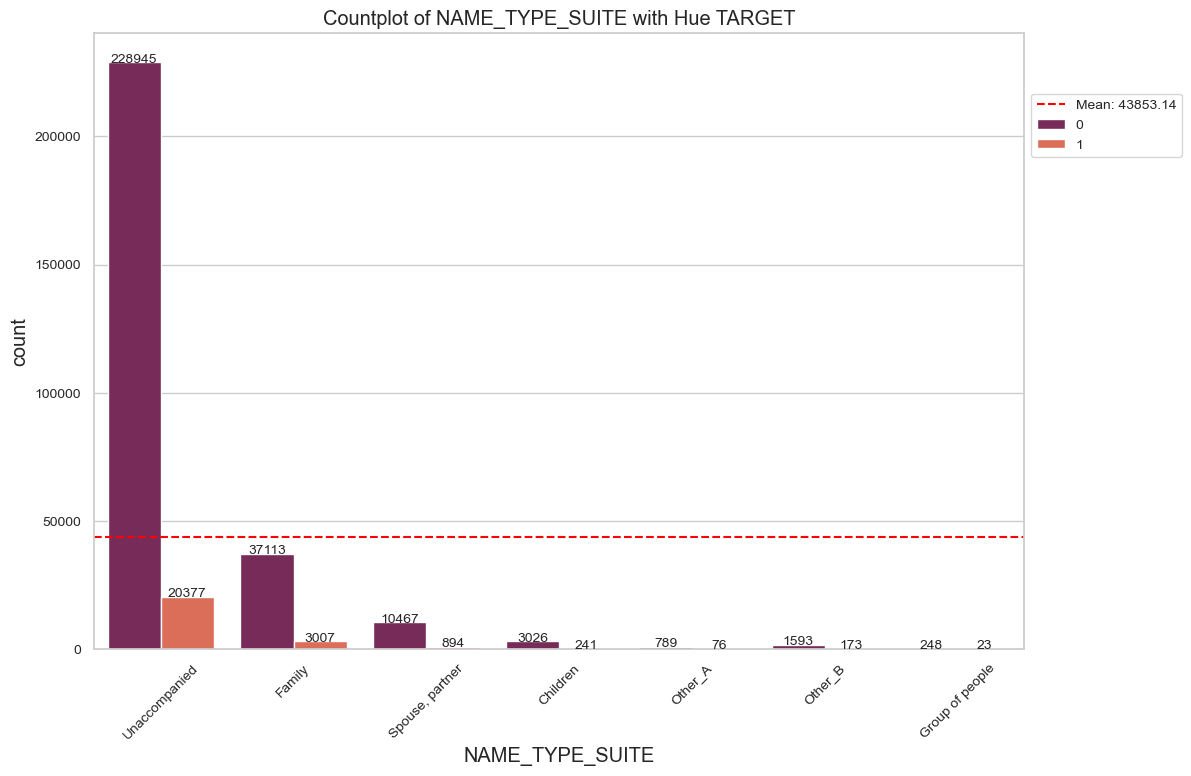

In [39]:
countplot_hue_mean(df,'NAME_TYPE_SUITE','TARGET',palette='rocket', width=0.8, figsize=(12,8), rotation=45)

### Name Income Type

In [40]:
df.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

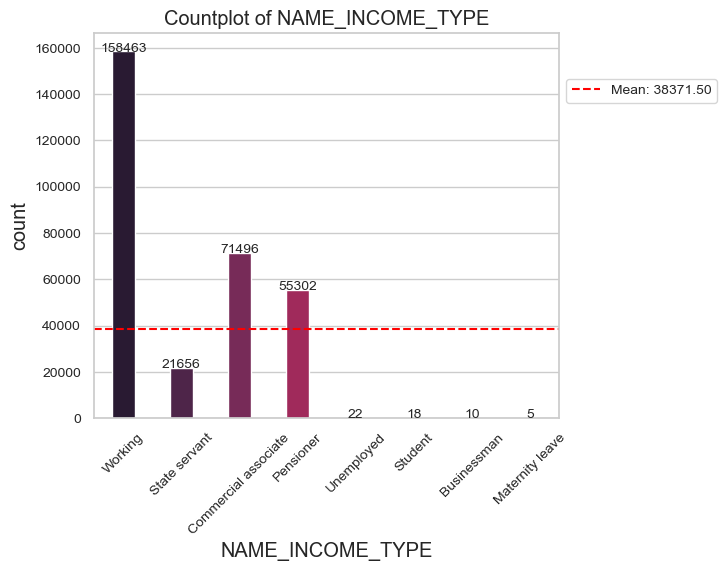

In [41]:
countplot_mean(df,'NAME_INCOME_TYPE', rotation=45)

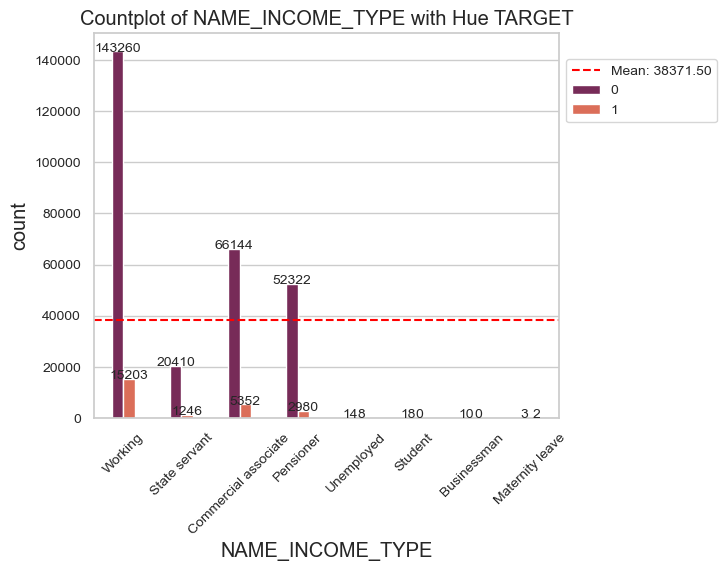

In [42]:
countplot_hue_mean(df,'NAME_INCOME_TYPE', 'TARGET', rotation=45)

In [43]:
count_target(df, 'TARGET','NAME_INCOME_TYPE')

Counts for TARGET = 0:
NAME_INCOME_TYPE
Working                 143260
Commercial associate     66144
Pensioner                52322
State servant            20410
Student                     18
Unemployed                  14
Businessman                 10
Maternity leave              3
Name: count, dtype: int64

Counts for TARGET = 1:
NAME_INCOME_TYPE
Working                 15203
Commercial associate     5352
Pensioner                2980
State servant            1246
Unemployed                  8
Maternity leave             2
Name: count, dtype: int64


### Name Education Type

In [44]:
count_target(df, 'TARGET', 'NAME_EDUCATION_TYPE')

Counts for TARGET = 0:
NAME_EDUCATION_TYPE
Secondary / secondary special    198527
Higher education                  70712
Incomplete higher                  9385
Lower secondary                    3396
Academic degree                     161
Name: count, dtype: int64

Counts for TARGET = 1:
NAME_EDUCATION_TYPE
Secondary / secondary special    19501
Higher education                  3999
Incomplete higher                  871
Lower secondary                    417
Academic degree                      3
Name: count, dtype: int64


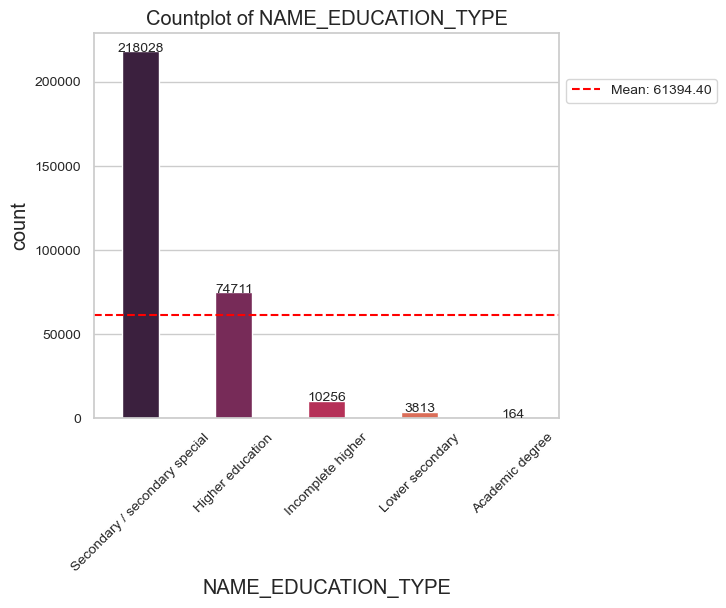

In [45]:
countplot_mean(df, 'NAME_EDUCATION_TYPE', rotation=45)

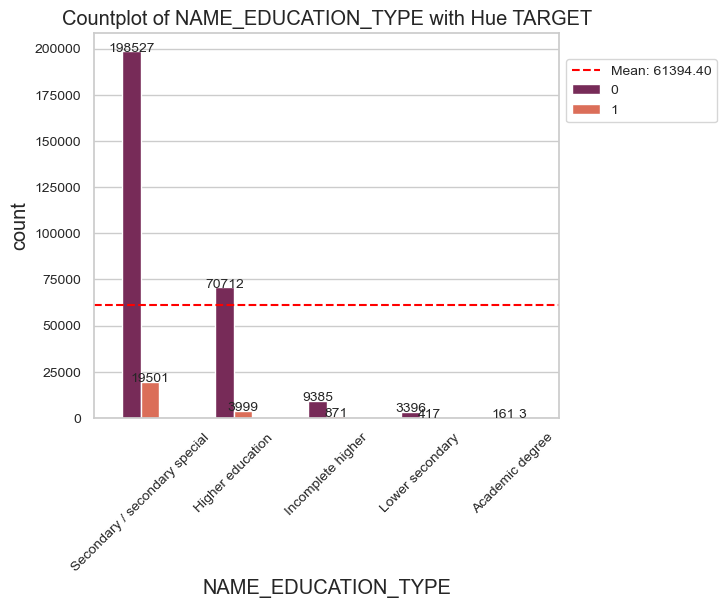

In [46]:
countplot_hue_mean(df, 'NAME_EDUCATION_TYPE', 'TARGET', rotation=45)

### Name Family Status

In [47]:
count3d(df,'NAME_FAMILY_STATUS','TARGET')

TARGET                     0      1  Sum_NAME_FAMILY_STATUS
NAME_FAMILY_STATUS                                         
Civil marriage         26751   2958                   29709
Married               181298  14826                  196124
Separated              18117   1620                   19737
Single / not married   40895   4450                   45345
Widow                  15120    937                   16057

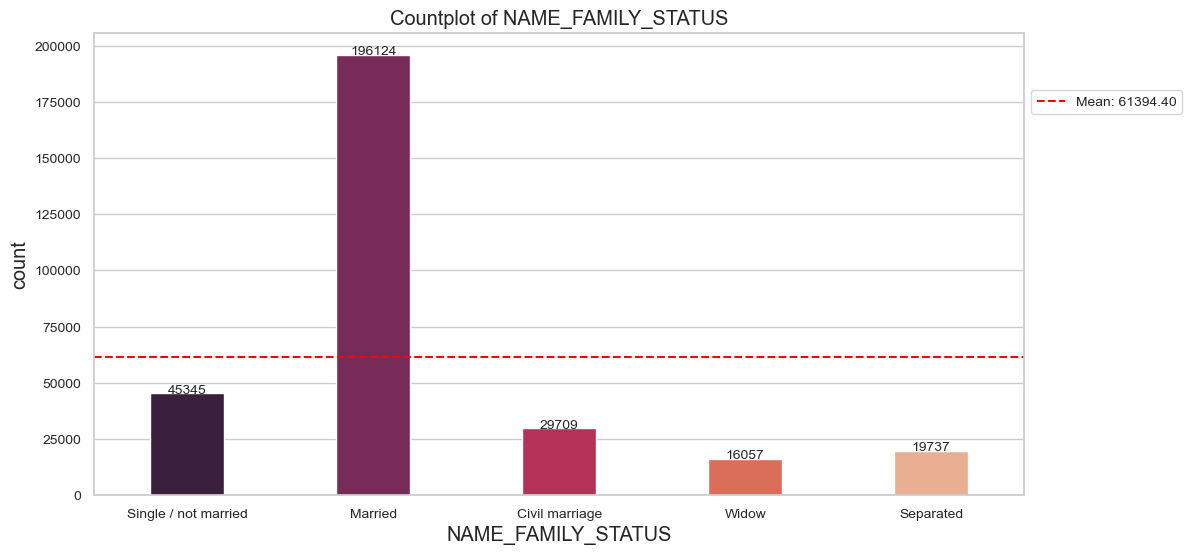

In [48]:
countplot_mean(df, 'NAME_FAMILY_STATUS', figsize=(12,6))

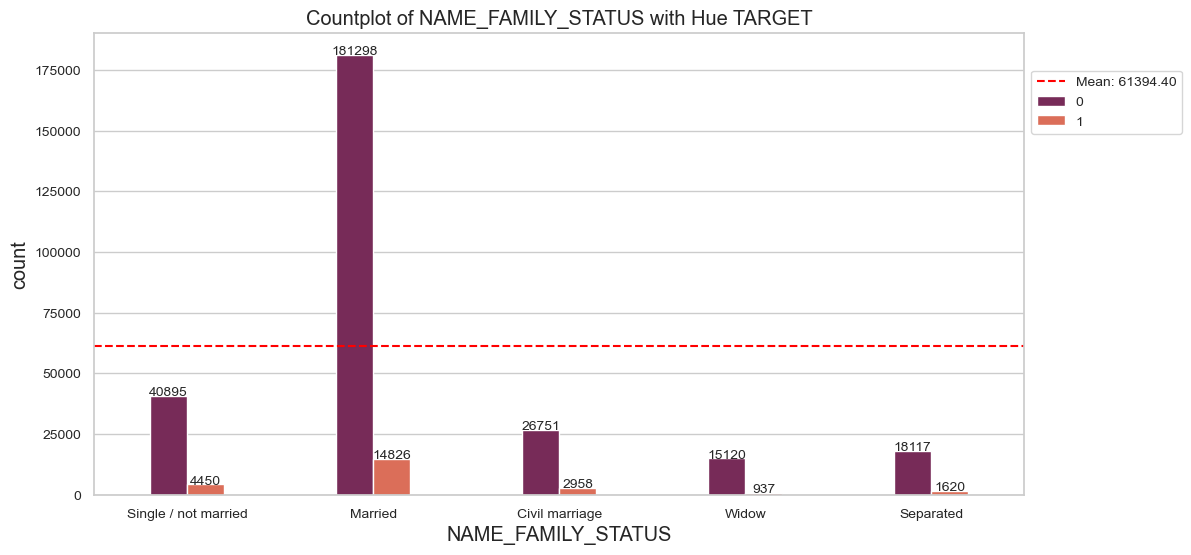

In [49]:
countplot_hue_mean(df, 'NAME_FAMILY_STATUS', 'TARGET', figsize=(12,6))

### Name Housing Type

In [50]:
count3d(df, 'NAME_HOUSING_TYPE', 'TARGET')

TARGET                    0      1  Sum_NAME_HOUSING_TYPE
NAME_HOUSING_TYPE                                        
Co-op apartment        1031     89                   1120
House / apartment    251153  21243                 272396
Municipal apartment   10207    954                  11161
Office apartment       2439    171                   2610
Rented apartment       4273    600                   4873
With parents          13078   1734                  14812

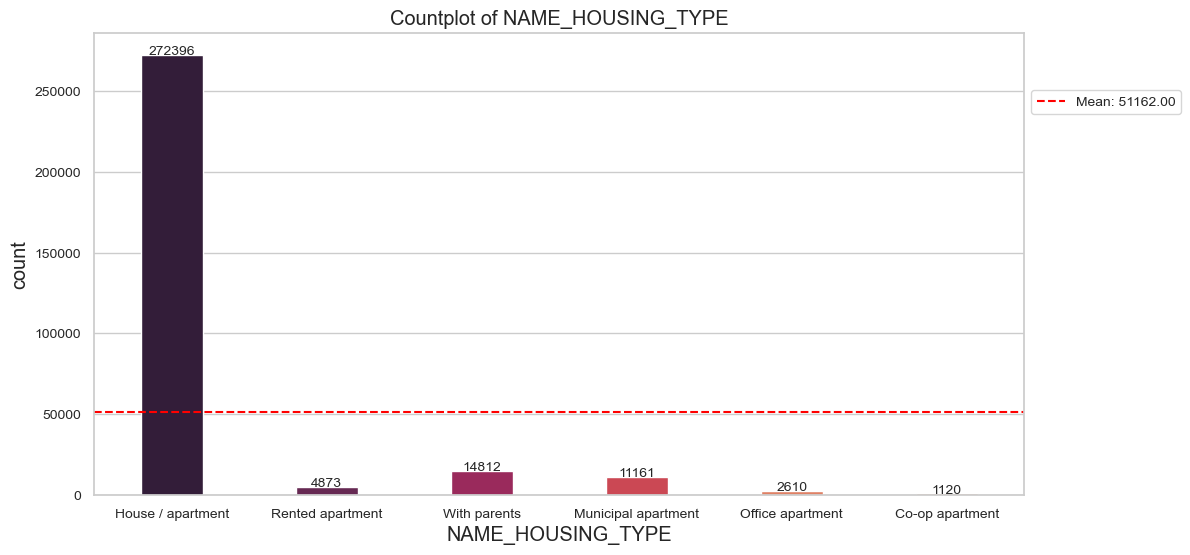

In [51]:
countplot_mean(df, 'NAME_HOUSING_TYPE', rotation=0, figsize=(12,6))

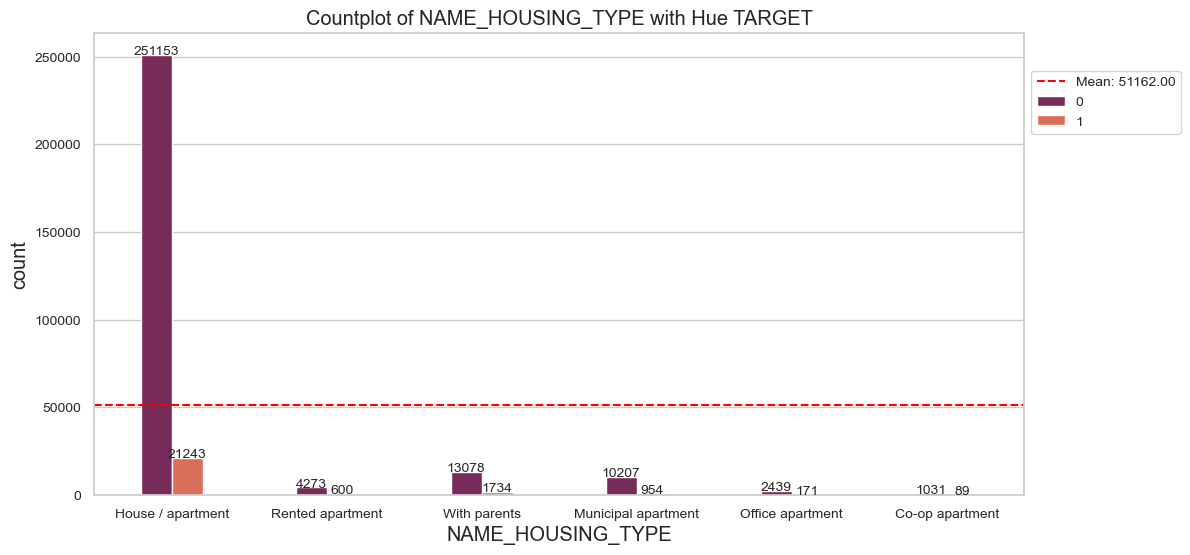

In [52]:
countplot_hue_mean(df, 'NAME_HOUSING_TYPE', 'TARGET', rotation=0, figsize=(12,6))

In [53]:
count3d(df,'NAME_HOUSING_TYPE', 'CODE_GENDER')

CODE_GENDER               F      M  XNA  Sum_NAME_HOUSING_TYPE
NAME_HOUSING_TYPE                                             
Co-op apartment         672    448    0                   1120
House / apartment    181279  91115    2                 272396
Municipal apartment    7858   3302    1                  11161
Office apartment       1528   1082    0                   2610
Rented apartment       2727   2146    0                   4873
With parents           8022   6790    0                  14812

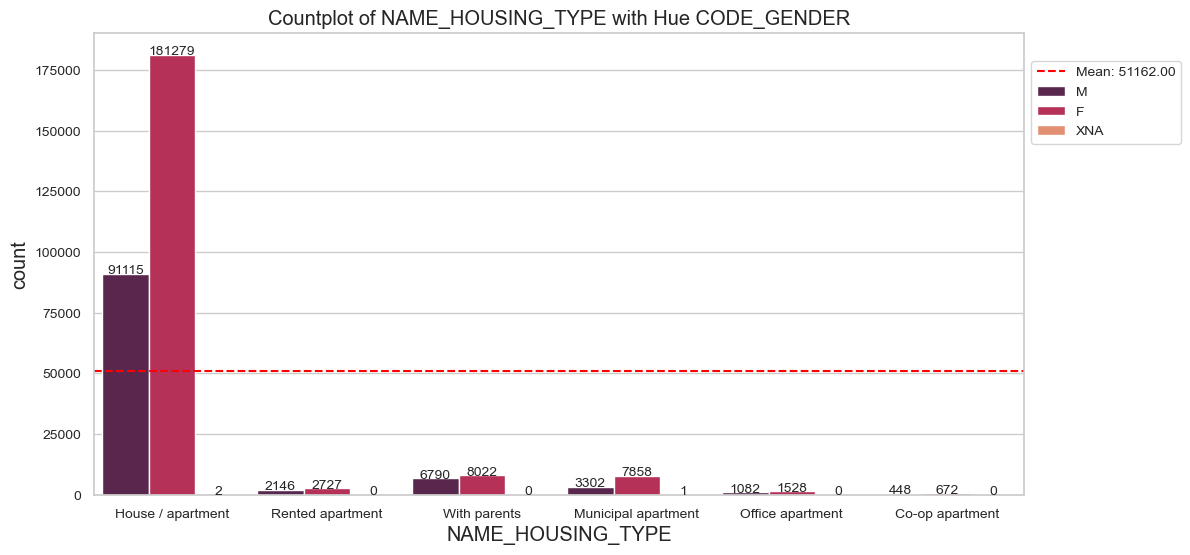

In [54]:
countplot_hue_mean(df, 'NAME_HOUSING_TYPE', 'CODE_GENDER', rotation=0, figsize=(12,6), width=0.9)

### Occupation Type

In [55]:
count3d(df,'OCCUPATION_TYPE','TARGET')

TARGET                      0      1  Sum_OCCUPATION_TYPE
OCCUPATION_TYPE                                          
Accountants              9315    474                 9789
Cleaning staff           4200    447                 4647
Cooking staff            5315    621                 5936
Core staff              25777   1734                27511
Drivers                 16469   2105                18574
HR staff                  527     35                  562
High skill tech staff   10657    701                11358
IT staff                  490     34                  524
Laborers               139248  12100               151348
Low-skill Laborers       1732    359                 2091
Managers                19995   1323                21318
Medicine staff           7949    571                 8520
Private service staff    2471    174                 2645
Realty agents             692     59                  751
Sales staff             28953   3089                32042
Secretaries              1211     92                 1303
Security staff           5989    721                 6710
Waiters/barmen staff     1191    152                 1343

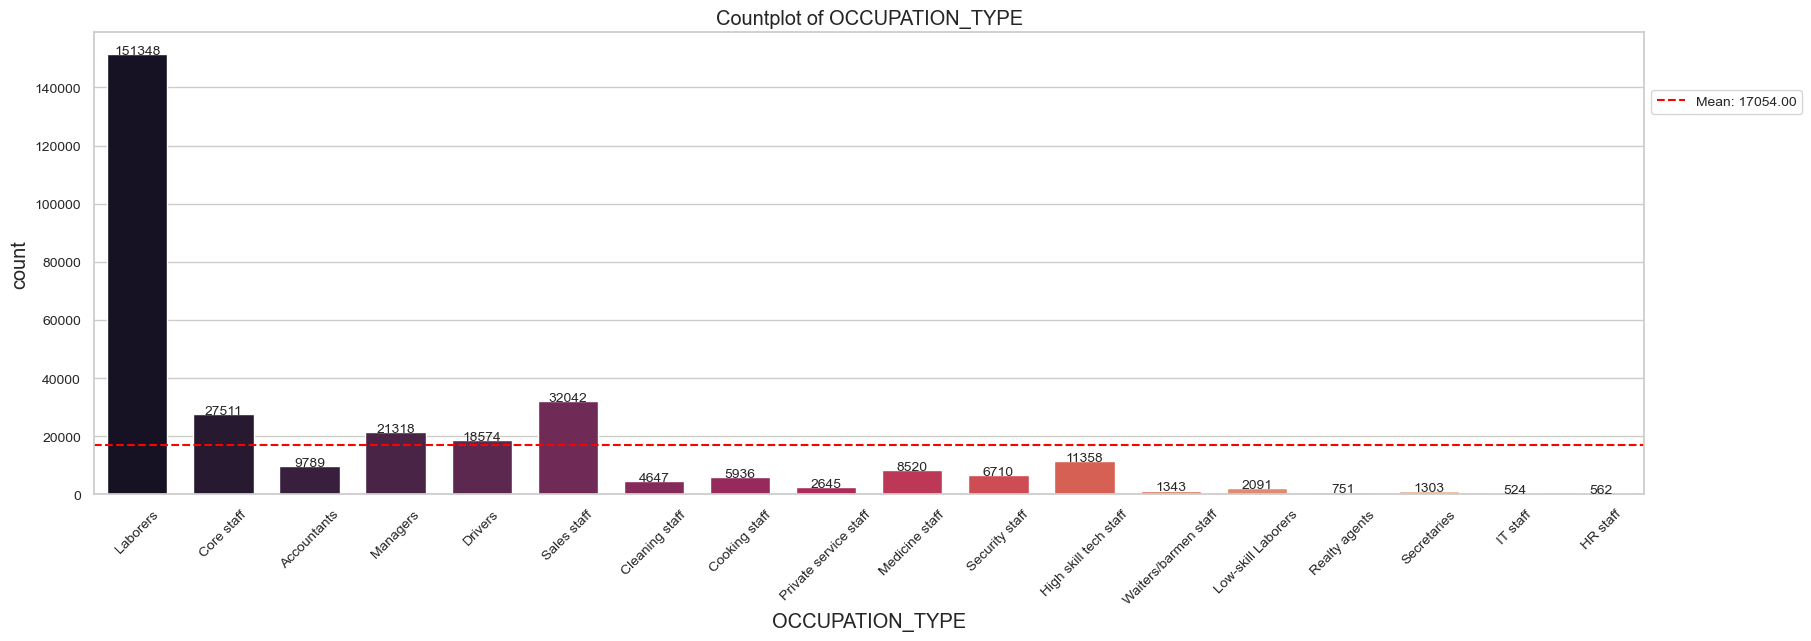

In [56]:
countplot_mean(df,'OCCUPATION_TYPE', rotation=45, figsize=(20,6), width=0.7)

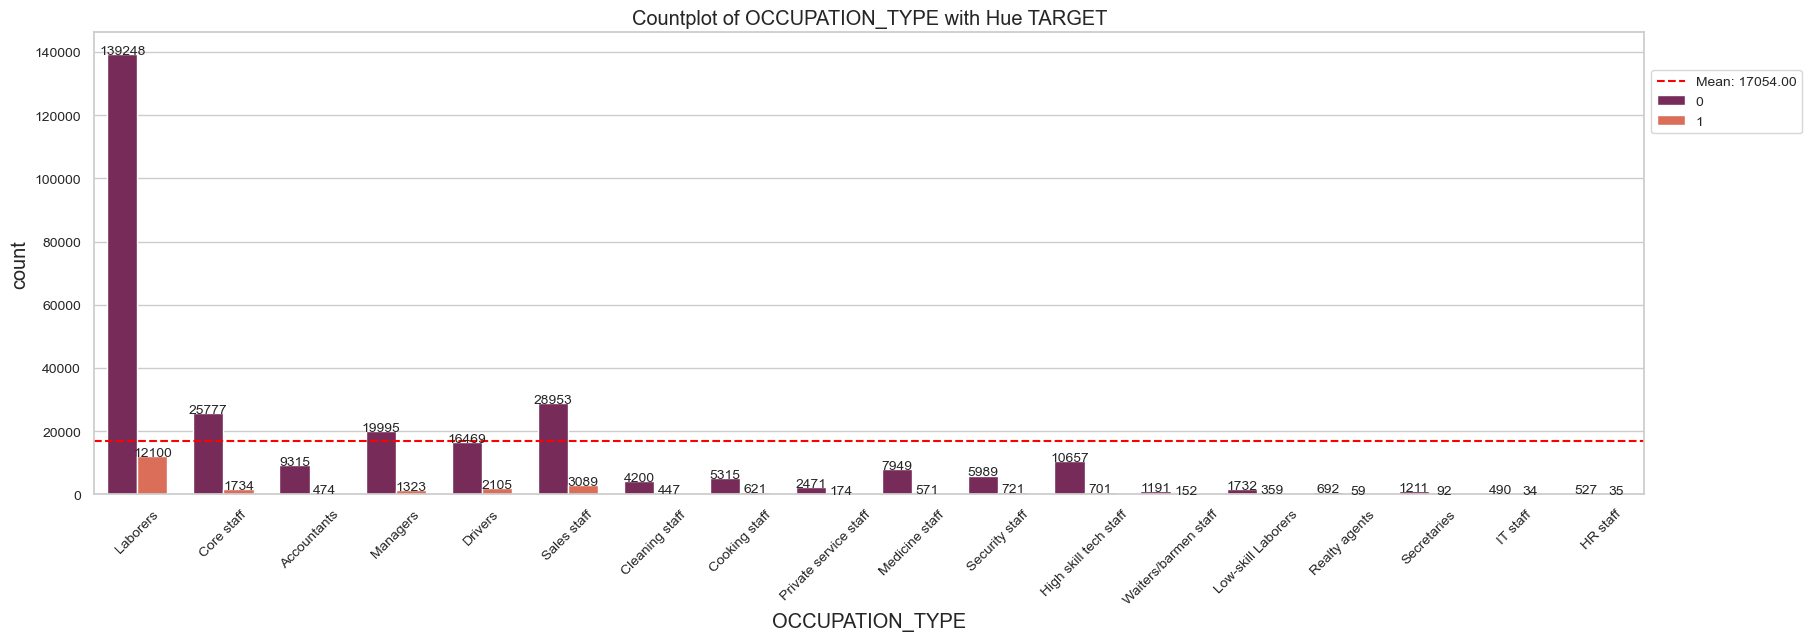

In [57]:
countplot_hue_mean(df,'OCCUPATION_TYPE', 'TARGET', rotation=45, figsize=(20,6), width=0.7)

### Weekday Appr Process Start

In [58]:
count3d(df,'WEEKDAY_APPR_PROCESS_START','TARGET')

TARGET                          0     1  Sum_WEEKDAY_APPR_PROCESS_START
WEEKDAY_APPR_PROCESS_START                                             
FRIDAY                      46154  4092                           50246
MONDAY                      46713  3930                           50643
SATURDAY                    31123  2663                           33786
SUNDAY                      14859  1280                           16139
THURSDAY                    46404  4093                           50497
TUESDAY                     49313  4497                           53810
WEDNESDAY                   47615  4236                           51851

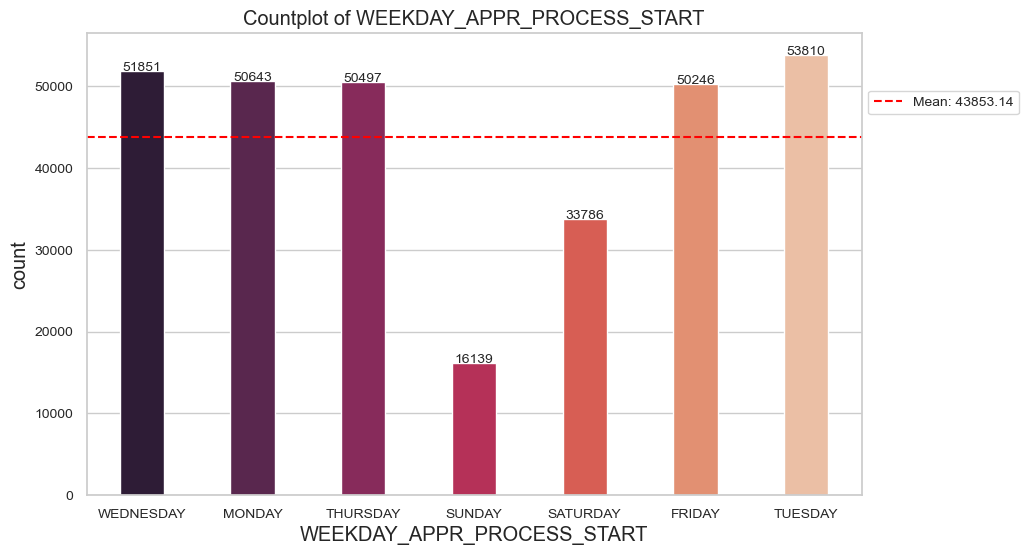

In [59]:
countplot_mean(df,'WEEKDAY_APPR_PROCESS_START', rotation=0, figsize=(10,6), width=0.4)

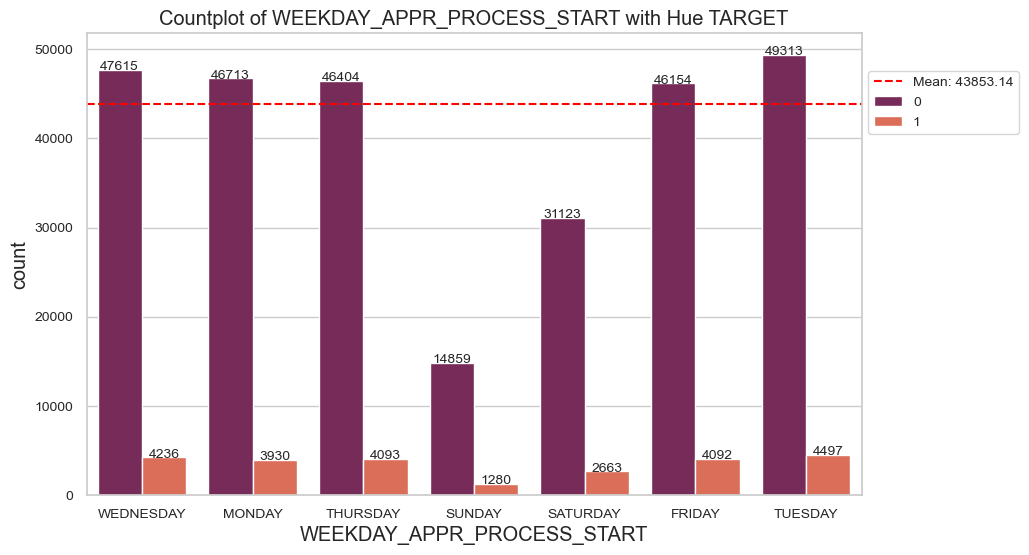

In [60]:
countplot_hue_mean(df,'WEEKDAY_APPR_PROCESS_START', 'TARGET', rotation=0, figsize=(10,6), width=0.8)

### Organization Type

In [61]:
count3d(df,'ORGANIZATION_TYPE','TARGET')

TARGET                      0     1  Sum_ORGANIZATION_TYPE
ORGANIZATION_TYPE                                         
Advertising               394    35                    429
Agriculture              2195   256                   2451
Bank                     2371   130                   2501
Business Entity Type 1   5492   487                   5979
Business Entity Type 2   9635   898                  10533
Business Entity Type 3  61553  6313                  67866
Cleaning                  231    29                    260
Construction             5925   784                   6709
Culture                   356    21                    377
Electricity               885    63                    948
Emergency                 519    39                    558
Government               9655   725                  10380
Hotel                     904    62                    966
Housing                  2717   233                   2950
Industry: type 1          923   115                   1038
Industry: type 10         101     7                    108
Industry: type 11        2468   234                   2702
Industry: type 12         355    14                    369
Industry: type 13          57     9                     66
Industry: type 2          424    33                    457
Industry: type 3         2924   348                   3272
Industry: type 4          786    89                    875
Industry: type 5          556    41                    597
Industry: type 6          104     8                    112
Industry: type 7         1201   105                   1306
Industry: type 8           21     3                     24
Industry: type 9         3139   225                   3364
Insurance                 562    34                    596
Kindergarten             6383   483                   6866
Legal Services            280    24                    304
Medicine                10437   736                  11173
Military                 2491   135                   2626
Mobile                    288    29                    317
Other                   15378  1275                  16653
Police                   2216   117                   2333
Postal                   1973   180                   2153
Realtor                   354    42                    396
Religion                   80     5                     85
Restaurant               1594   212                   1806
School                   8350   526                   8876
Security                 2915   324                   3239
Security Ministries      1874    96                   1970
Self-employed           34428  3901                  38329
Services                 1469   103                   1572
Telecom                   532    44                    576
Trade: type 1             317    31                    348
Trade: type 2            1757   132                   1889
Trade: type 3            3125   361                   3486
Trade: type 4              62     2                     64
Trade: type 5              46     3                     49
Trade: type 6             601    29                    630
Trade: type 7            7080   739                   7819
Transport: type 1         192     9                    201
Transport: type 2        2030   172                   2202
Transport: type 3         998   187                   1185
Transport: type 4        4887   501                   5388
University               1261    65                   1326
XNA                     52330  2988                  55318

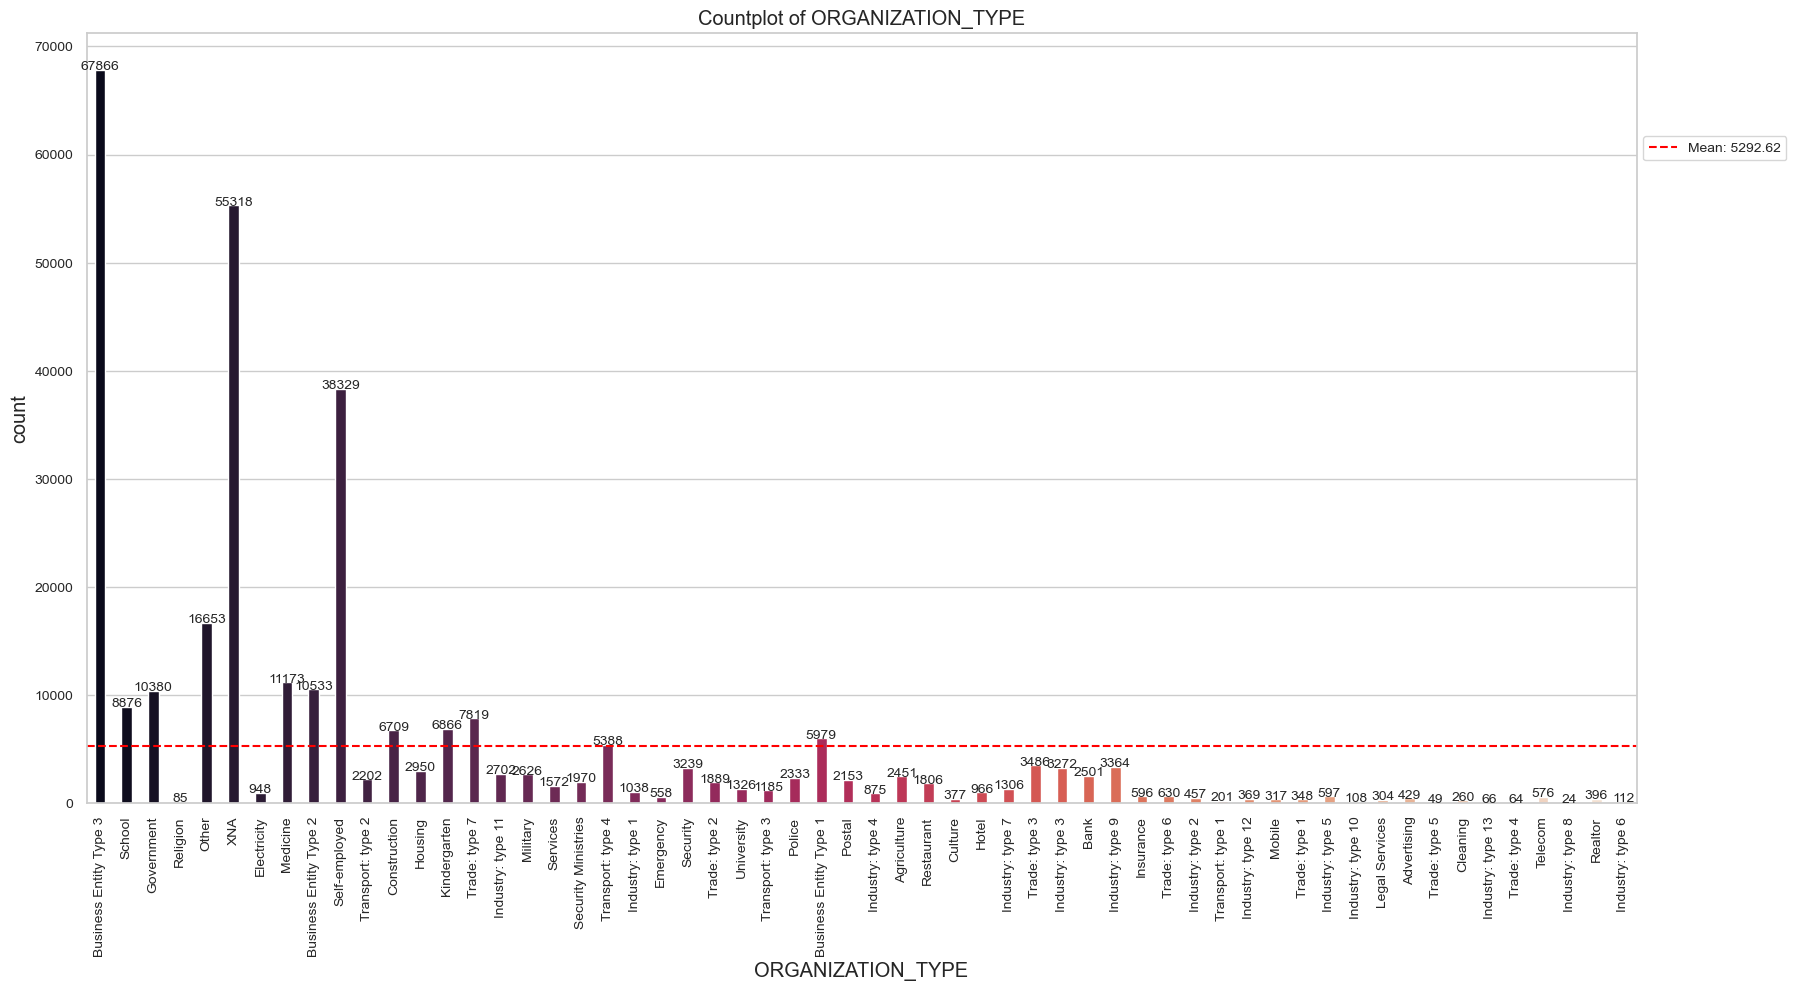

In [62]:
countplot_mean(df,'ORGANIZATION_TYPE',rotation=90, figsize=(20,10))

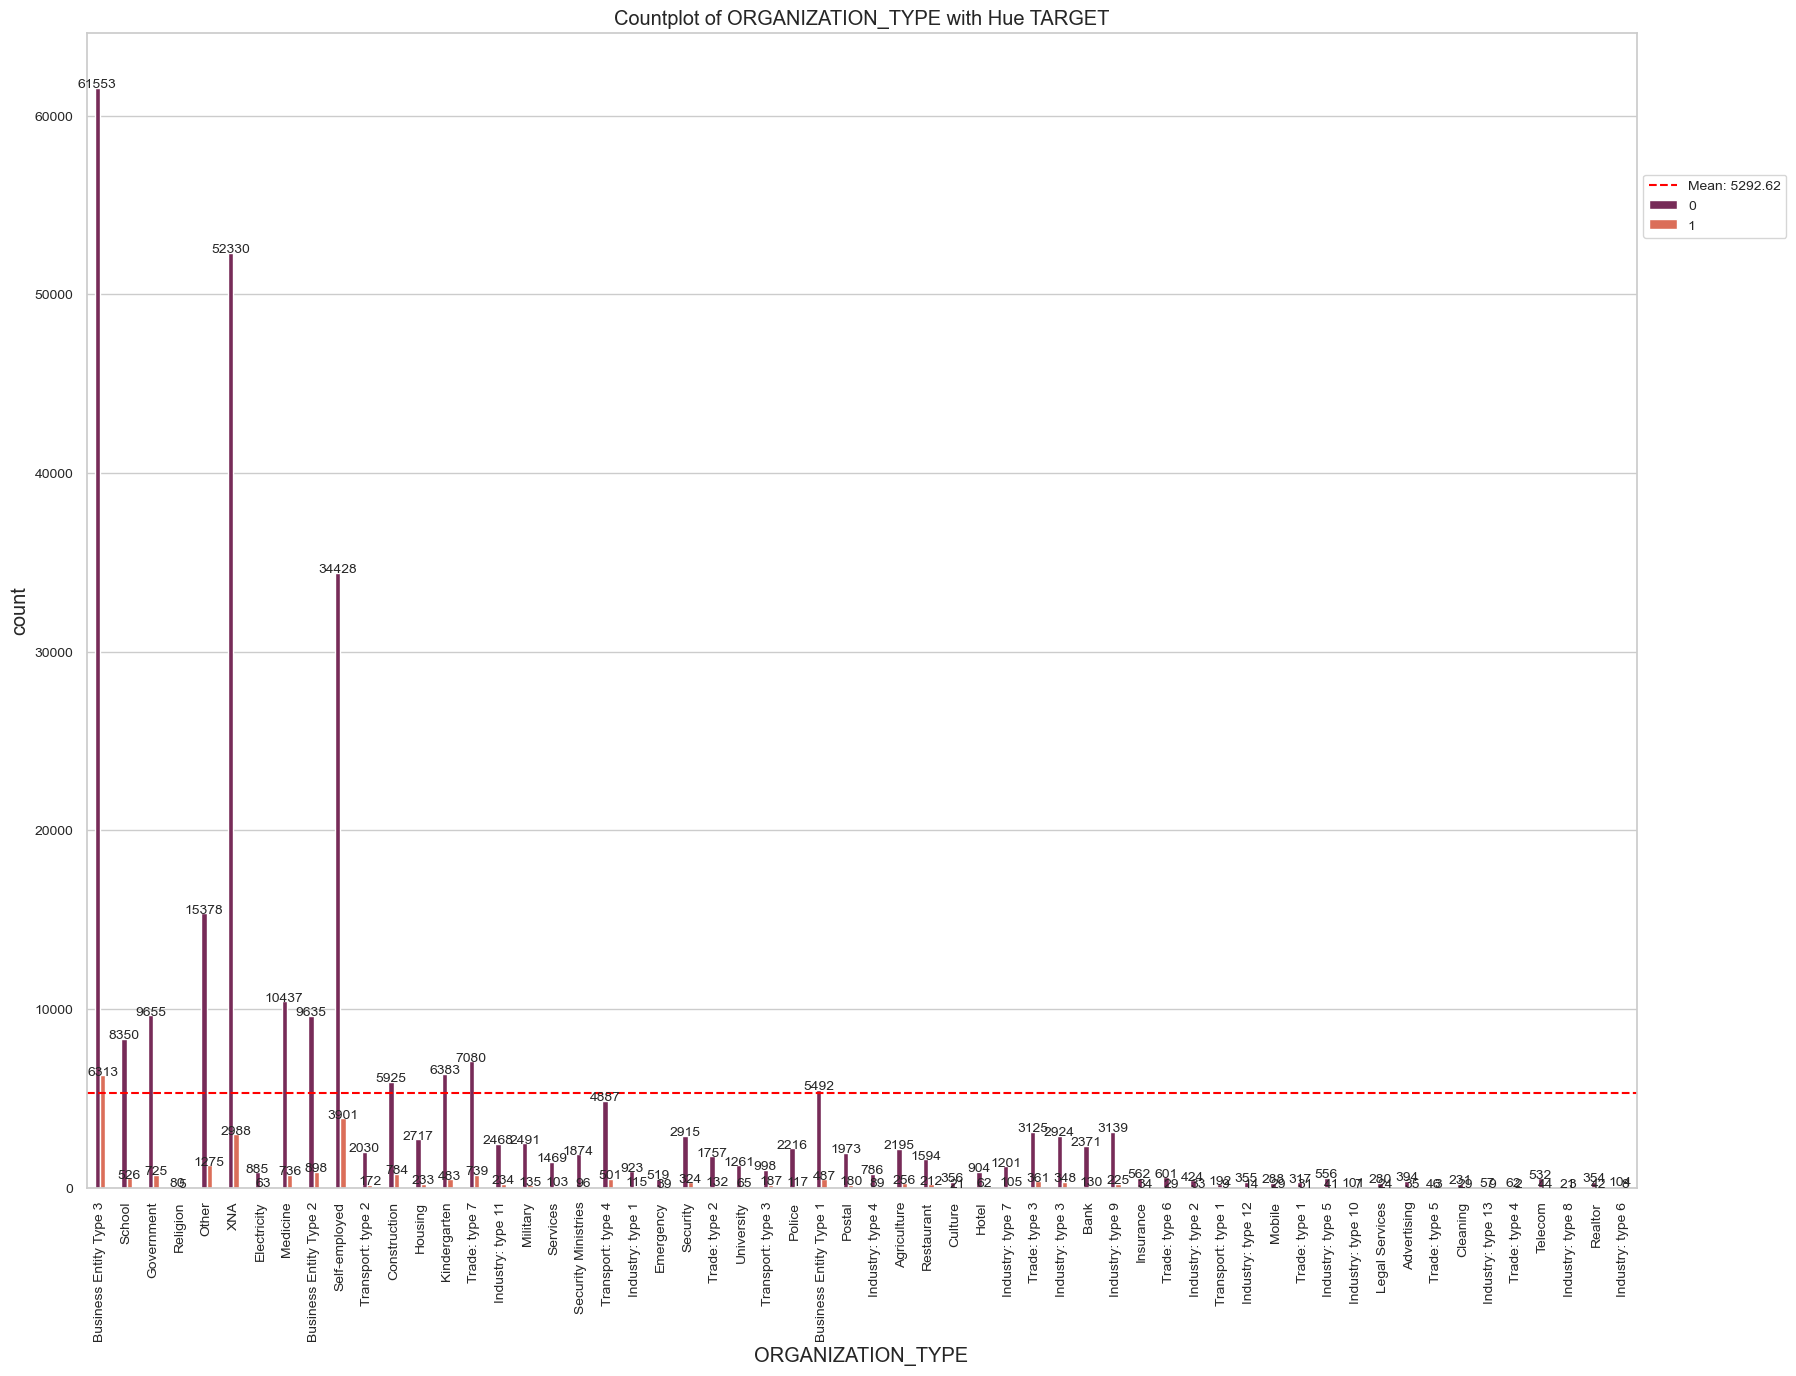

In [63]:
countplot_hue_mean(df,'ORGANIZATION_TYPE','TARGET',rotation=90, figsize=(20,15))

## Pairplot & Correlation Plot

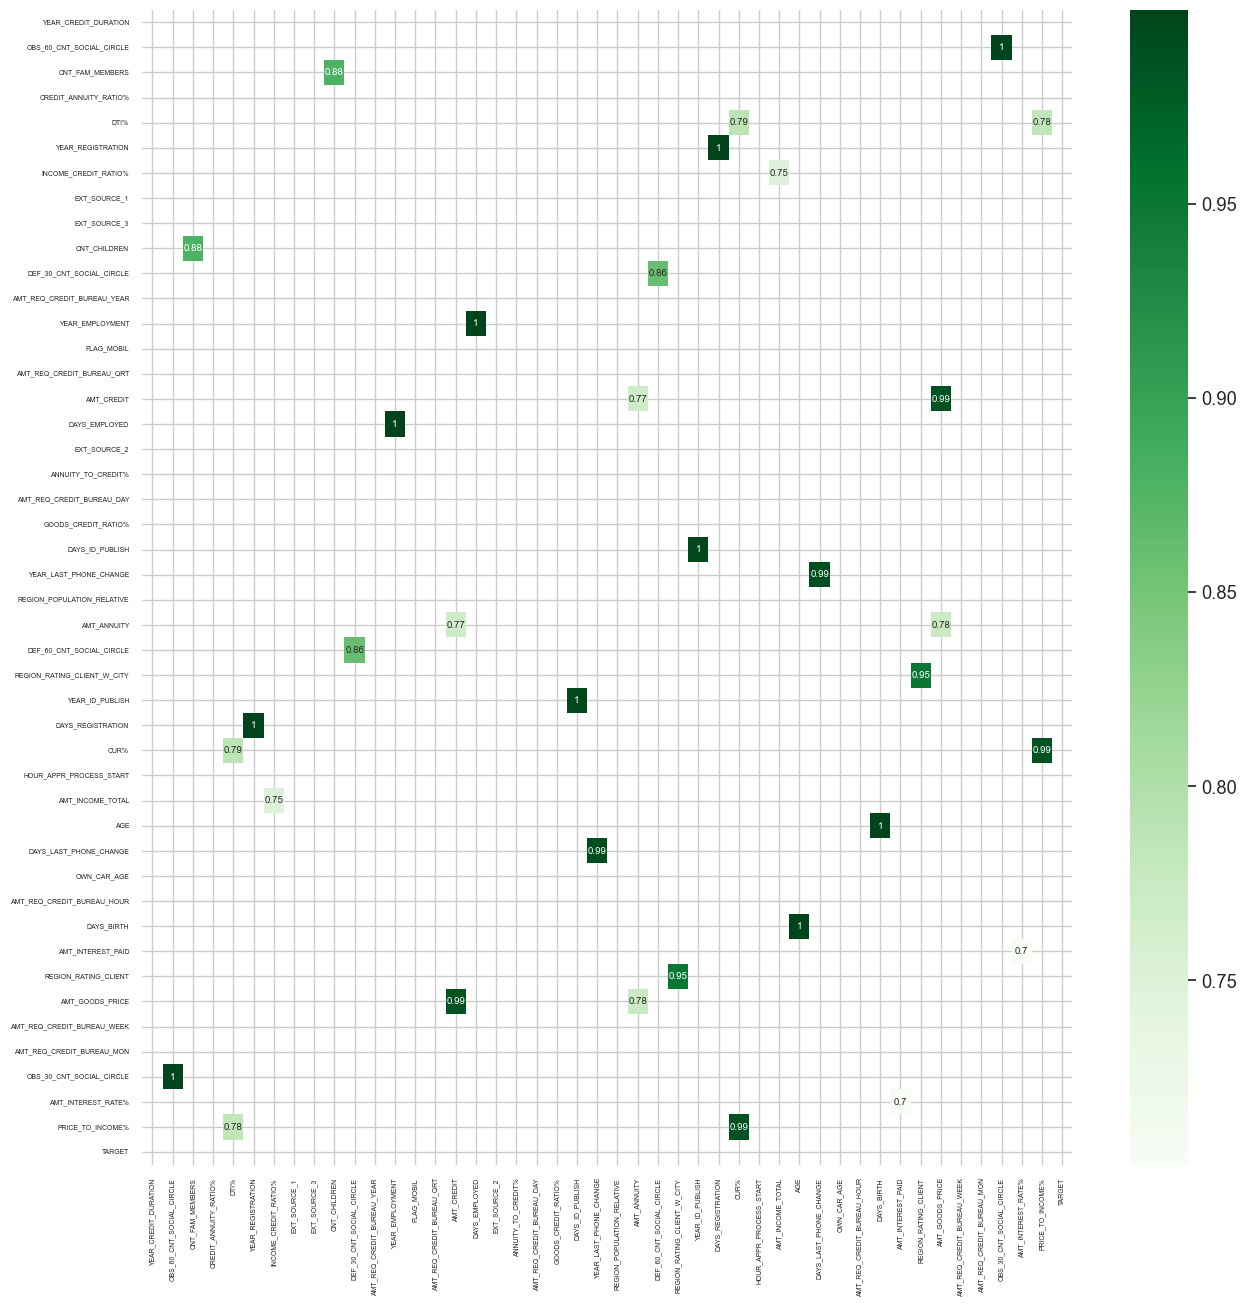

In [64]:
cormtrx = df[numb].corr()

# Filter values above 0.7 (adjust the threshold as needed)
cmx7 = cormtrx[(cormtrx > 0.7) & (cormtrx < 1)]

fig = plt.figure(figsize=(15, 15))

sns.heatmap(cmx7, annot=True, cmap='Greens', annot_kws={"size": 7})

plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show();

In [65]:
# Selected Features for Pairplot
pairfeat = ['AGE',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'ANNUITY_TO_CREDIT%',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'CREDIT_ANNUITY_RATIO%',
 'CUR%',
 'DTI%',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'GOODS_CREDIT_RATIO%',
 'HOUR_APPR_PROCESS_START',
 'INCOME_CREDIT_RATIO%',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'OWN_CAR_AGE',
 'PRICE_TO_INCOME%',
 'TARGET',
 'WEEKDAY_APPR_PROCESS_START',
 'YEAR_EMPLOYMENT',
 'YEAR_ID_PUBLISH',
 'YEAR_LAST_PHONE_CHANGE',
 'YEAR_REGISTRATION']


## Handling Outlier

### Detecting Outlier

In [66]:
# Checking Outliers
numerical_columns = df.select_dtypes(exclude=['object', 'bool']).columns

numerical_df = df[numerical_columns]

desc_df = numerical_df.describe().round(2)
desc_df = desc_df.T

desc_df['nunique'] = 0  # kolom nunique

for col in numerical_columns:
    nunique = numerical_df[col].nunique()
    
    desc_df.at[col, 'nunique'] = nunique

desc_df['iqr'] = (desc_df['75%'] - desc_df['25%']).round(2)
desc_df['lowt'] = (desc_df['25%'] - (1.5 * desc_df['iqr'])).round(2)
desc_df['hit'] = (desc_df['75%'] + (1.5 * desc_df['iqr']))
desc_df['out_low'] = desc_df['min'] < desc_df['lowt']
desc_df['out_hi'] = desc_df['max'] > desc_df['hit']

desc_df['outliers_low_count'] = 0  # jumlah outliers bawah
desc_df['outliers_hi_count'] = 0  # jumlah outliers atas

for col in numerical_columns:
    lower_outliers = (numerical_df[col] < desc_df.loc[col, 'lowt']).sum()
    upper_outliers = (numerical_df[col] > desc_df.loc[col, 'hit']).sum()
    desc_df.at[col, 'outliers_low_count'] = lower_outliers
    desc_df.at[col, 'outliers_hi_count'] = upper_outliers

desc_df = desc_df.sort_values(by='nunique', ascending=True)
desc_df.sort_index(ascending=True)

count       mean        std       min  \
AGE                         306,972.0      43.44      11.95      20.0   
AMT_ANNUITY                 306,972.0  27,131.96  14,491.03   1,615.5   
AMT_CREDIT                  306,972.0 599,608.53 402,543.95  45,000.0   
AMT_GOODS_PRICE             306,972.0 538,486.38 369,526.98  40,500.0   
AMT_INCOME_TOTAL            306,972.0 168,837.94 237,302.75  25,650.0   
AMT_INTEREST_PAID           306,972.0  61,122.16  70,029.63       0.0   
AMT_INTEREST_RATE%          306,972.0      12.34      12.32       0.0   
AMT_REQ_CREDIT_BUREAU_DAY   306,972.0       0.01        0.1       0.0   
AMT_REQ_CREDIT_BUREAU_HOUR  306,972.0       0.01       0.08       0.0   
AMT_REQ_CREDIT_BUREAU_MON   306,972.0       0.23       0.86       0.0   
AMT_REQ_CREDIT_BUREAU_QRT   306,972.0       0.23       0.74       0.0   
AMT_REQ_CREDIT_BUREAU_WEEK  306,972.0       0.03       0.19       0.0   
AMT_REQ_CREDIT_BUREAU_YEAR  306,972.0       1.78       1.77       0.0   
ANNUITY_TO_CREDIT%          306,972.0       5.37       2.25      0.61   
CNT_CHILDREN                306,972.0       0.42       0.72       0.0   
CNT_FAM_MEMBERS             306,972.0       2.15       0.91       1.0   
CREDIT_ANNUITY_RATIO%       306,972.0       5.37       2.25      0.61   
CUR%                        306,972.0       3.96       2.69       0.0   
DAYS_BIRTH                  306,972.0  16,039.15   4,363.83   7,489.0   
DAYS_EMPLOYED               306,972.0  67,773.23 139,484.16       0.0   
DAYS_ID_PUBLISH             306,972.0   2,994.41    1,509.3       0.0   
DAYS_LAST_PHONE_CHANGE      306,972.0     962.99     826.96       0.0   
DAYS_REGISTRATION           306,972.0   4,986.29   3,523.31       0.0   
DEF_30_CNT_SOCIAL_CIRCLE    306,972.0       0.14       0.45       0.0   
DEF_60_CNT_SOCIAL_CIRCLE    306,972.0        0.1       0.36       0.0   
DTI%                        306,972.0      18.11       9.46      0.02   
EXT_SOURCE_1                306,972.0        0.5       0.14      0.01   
EXT_SOURCE_2                306,972.0       0.51       0.19       0.0   
EXT_SOURCE_3                306,972.0       0.52       0.17       0.0   
FLAG_CONT_MOBILE            306,972.0        1.0       0.04       0.0   
FLAG_DOCUMENT_11            306,972.0        0.0       0.06       0.0   
FLAG_DOCUMENT_18            306,972.0       0.01       0.09       0.0   
FLAG_DOCUMENT_3             306,972.0       0.71       0.45       0.0   
FLAG_DOCUMENT_4             306,972.0        0.0       0.01       0.0   
FLAG_DOCUMENT_5             306,972.0       0.01       0.12       0.0   
FLAG_DOCUMENT_6             306,972.0       0.09       0.28       0.0   
FLAG_DOCUMENT_7             306,972.0        0.0       0.01       0.0   
FLAG_DOCUMENT_8             306,972.0       0.08       0.27       0.0   
FLAG_DOCUMENT_9             306,972.0        0.0       0.06       0.0   
FLAG_EMAIL                  306,972.0       0.06       0.23       0.0   
FLAG_EMP_PHONE              306,972.0       0.82       0.38       0.0   
FLAG_MOBIL                  306,972.0        1.0        0.0       1.0   
FLAG_PHONE                  306,972.0       0.28       0.45       0.0   
FLAG_WORK_PHONE             306,972.0        0.2        0.4       0.0   
GOODS_CREDIT_RATIO%         306,972.0      89.99       9.08     16.67   
HOUR_APPR_PROCESS_START     306,972.0      12.06       3.27       0.0   
INCOME_CREDIT_RATIO%        306,972.0      39.93      50.82      1.18   
LIVE_CITY_NOT_WORK_CITY     306,972.0       0.18       0.38       0.0   
LIVE_REGION_NOT_WORK_REGION 306,972.0       0.04        0.2       0.0   
OBS_30_CNT_SOCIAL_CIRCLE    306,972.0       1.42        2.4       0.0   
OBS_60_CNT_SOCIAL_CIRCLE    306,972.0        1.4       2.38       0.0   
OWN_CAR_AGE                 306,972.0       4.11       9.01       0.0   
PRICE_TO_INCOME%            306,972.0     354.49     242.83      0.39   
REGION_POPULATION_RELATIVE  306,972.0       0.02       0.01       0.0   
REGION_RATING_CLI

In [67]:
desc_df.loc[desc_df['outliers_hi_count'].idxmax()]

count                306,972.0
mean                      0.23
std                       0.42
min                        0.0
25%                        0.0
50%                        0.0
75%                        0.0
max                        1.0
nunique                      2
iqr                        0.0
lowt                       0.0
hit                        0.0
out_low                  False
out_hi                    True
outliers_low_count           0
outliers_hi_count        70730
Name: REG_CITY_NOT_WORK_CITY, dtype: object

### Handling Outlier IQR

In [68]:
do = df.copy()

qn = 0.75

do = do[do['AMT_INCOME_TOTAL'] <= df['AMT_INCOME_TOTAL'].quantile(qn)]
do = do[do['AMT_CREDIT']       <= df['AMT_CREDIT'].quantile(qn)]
do = do[do['AMT_ANNUITY']      <= df['AMT_ANNUITY'].quantile(qn)]
do = do[do['AMT_GOODS_PRICE']  <= df['AMT_GOODS_PRICE'].quantile(qn)]
do = do[do['AMT_INTEREST_PAID']     <= df['AMT_INTEREST_PAID'].quantile(qn)]
do = do[do['AMT_INTEREST_RATE%']    <= df['AMT_INTEREST_RATE%'].quantile(qn)]
do = do[do['INCOME_CREDIT_RATIO%']  <= df['INCOME_CREDIT_RATIO%'].quantile(qn)]
do = do[do['YEAR_REGISTRATION']     <= df['YEAR_REGISTRATION'].quantile(qn)]
do = do[do['YEAR_CREDIT_DURATION']  <= df['YEAR_CREDIT_DURATION'].quantile(qn)]
do = do[do['OWN_CAR_AGE']           <= df['OWN_CAR_AGE'].quantile(qn)]
do = do[do['PRICE_TO_INCOME%']      <= df['PRICE_TO_INCOME%'].quantile(qn)]
do = do[do['YEAR_EMPLOYMENT']       <= df['YEAR_EMPLOYMENT'].quantile(0.76)]

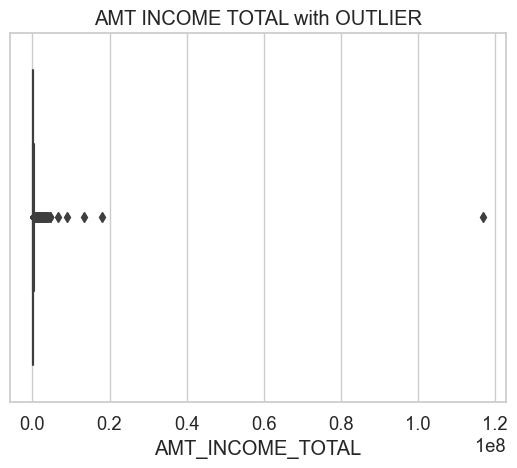

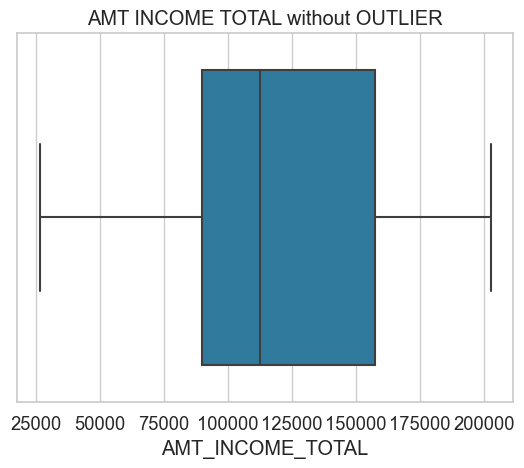

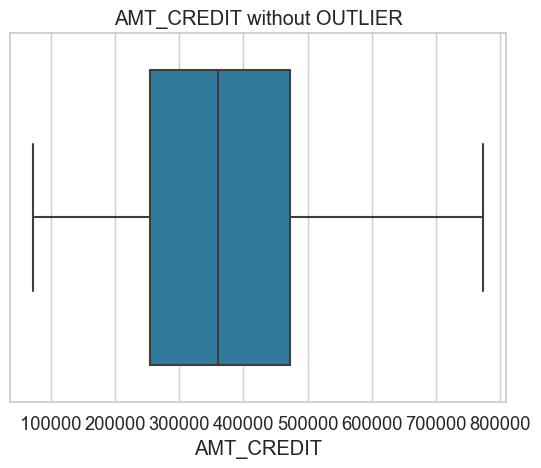

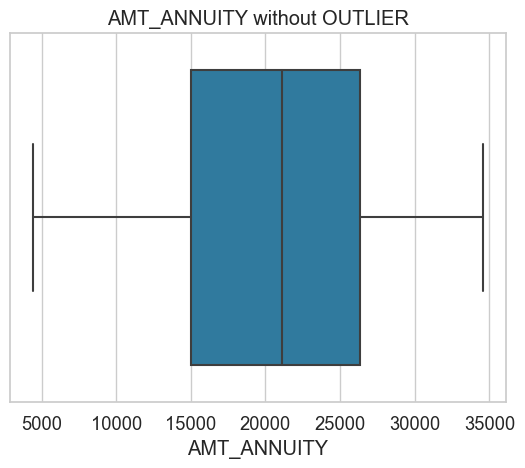

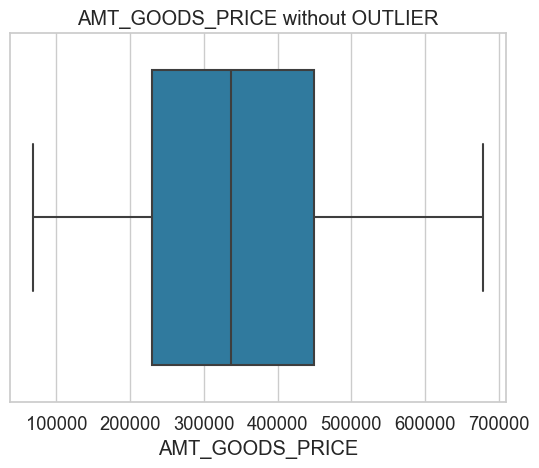

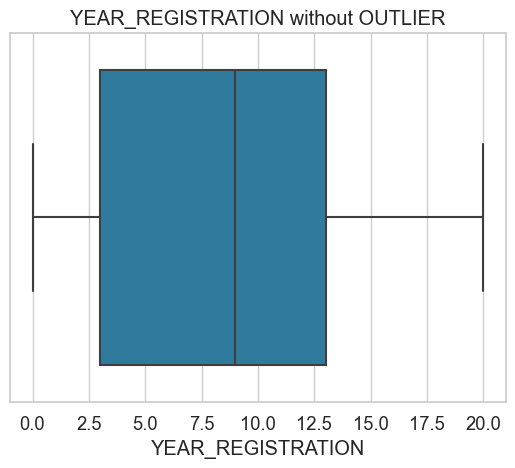

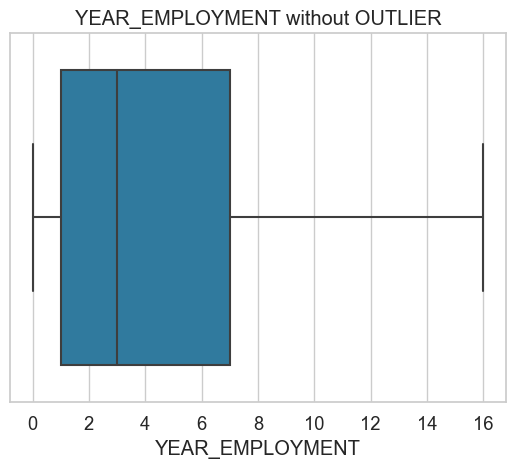

In [69]:
sns.boxplot(df, x='AMT_INCOME_TOTAL')
plt.title("AMT INCOME TOTAL with OUTLIER")
plt.show();

sns.boxplot(do, x='AMT_INCOME_TOTAL')
plt.title("AMT INCOME TOTAL without OUTLIER")
plt.show();

sns.boxplot(do, x='AMT_CREDIT')
plt.title("AMT_CREDIT without OUTLIER")
plt.show();

sns.boxplot(do, x='AMT_ANNUITY')
plt.title("AMT_ANNUITY without OUTLIER")
plt.show();

sns.boxplot(do, x='AMT_GOODS_PRICE')
plt.title("AMT_GOODS_PRICE without OUTLIER")
plt.show();

sns.boxplot(do, x='YEAR_REGISTRATION')
plt.title("YEAR_REGISTRATION without OUTLIER")
plt.show();

sns.boxplot(do, x='YEAR_EMPLOYMENT')
plt.title("YEAR_EMPLOYMENT without OUTLIER")
plt.show();

In [70]:
do['YEAR_EMPLOYMENT'].describe()
do['YEAR_EMPLOYMENT'].quantile(0.79599999999999)
do['YEAR_EMPLOYMENT'].quantile(0.796)

count            25,707.0
mean    4.319251565721399
std     3.872525813169074
min                   0.0
25%                   1.0
50%                   3.0
75%                   7.0
max                  16.0
Name: YEAR_EMPLOYMENT, dtype: float64

7.0

7.0

In [71]:
df.shape
do.shape

(306972, 82)

(25707, 82)

## Features Selections

In [72]:
features = do.columns

In [73]:
fta = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OWN_CAR_AGE','OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'AGE', 'YEAR_EMPLOYMENT','YEAR_REGISTRATION', 'YEAR_ID_PUBLISH', 
       'YEAR_LAST_PHONE_CHANGE','DTI%', 'CUR%', 'PRICE_TO_INCOME%', 
       'ANNUITY_TO_CREDIT%', 'INCOME_CREDIT_RATIO%','CREDIT_ANNUITY_RATIO%', 
       'GOODS_CREDIT_RATIO%', 'AMT_INTEREST_PAID', 'AMT_INTEREST_RATE%', 
       'YEAR_CREDIT_DURATION','TARGET']

ftb = ['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE', 
       'AGE', 'YEAR_REGISTRATION', 'YEAR_ID_PUBLISH', 
       'YEAR_LAST_PHONE_CHANGE','DTI%', 'CUR%', 'PRICE_TO_INCOME%', 
       'ANNUITY_TO_CREDIT%', 'INCOME_CREDIT_RATIO%','CREDIT_ANNUITY_RATIO%', 
       'GOODS_CREDIT_RATIO%', 'AMT_INTEREST_PAID', 'AMT_INTEREST_RATE%', 
       'YEAR_CREDIT_DURATION','TARGET']

ftc = ['DTI%', 'CUR%','PRICE_TO_INCOME%', 'ANNUITY_TO_CREDIT%',
       'INCOME_CREDIT_RATIO%','CREDIT_ANNUITY_RATIO%', 'GOODS_CREDIT_RATIO%','TARGET']

In [74]:
dc = do.copy()

In [75]:
from sklearn.preprocessing import LabelEncoder

# define column has type Object to implement LabelEncoder
list_object = dc.select_dtypes("object").columns.tolist()
encoder = LabelEncoder()

for col in list_object:
    dc[col] = encoder.fit_transform(dc[col].values.tolist())

In [76]:
X = dc[features].drop('TARGET', axis=1)
y = dc['TARGET']  # Target

### Kendals Coefficient

In [77]:
%%time

from scipy.stats import kendalltau

dk = pd.concat([X, y], axis=1)
kendall_correlations = dk.corrwith(dk['TARGET'], method='kendall')

CPU times: user 239 ms, sys: 10.7 ms, total: 250 ms
Wall time: 248 ms


In [78]:
# Sort Kendall's rank coefficients in descending order
sorted_kendall_correlations = kendall_correlations.sort_values(ascending=False)

# Display the sorted Kendall's rank coefficients
print("Sorted Kendall's rank coefficient for each feature:")
kc = sorted_kendall_correlations.reset_index()
kc.rename(columns={'index' : 'features', 0:'scores'}, inplace=True)
kc = kc[kc['scores'] > 0]
kc = kc.sort_values(by='scores', ascending=False)
kc.shape
kc.head(9)
kc.tail(9)

Sorted Kendall's rank coefficient for each feature:


(40, 2)

features               scores
0                       TARGET   0.9999999999999999
1                  CODE_GENDER  0.07469826948777379
2                      AGE_CAT  0.06297790356191409
3              FLAG_DOCUMENT_3 0.061375818313326495
4  REGION_RATING_CLIENT_W_CITY    0.059994369435771
5         REGION_RATING_CLIENT  0.05807805390245022
6          NAME_EDUCATION_TYPE  0.05556778586643064
7        CREDIT_ANNUITY_RATIO% 0.049750779064409355
8           ANNUITY_TO_CREDIT% 0.049750779064409355

features                scores
31  REG_REGION_NOT_LIVE_REGION 0.0053393735046657065
32                  SK_ID_CURR  0.003567680805997067
33  AMT_REQ_CREDIT_BUREAU_HOUR 0.0028901383770437027
34              FLAG_EMP_PHONE 0.0021140385870644434
35             NAME_TYPE_SUITE 0.0016717395829455718
36                  FLAG_EMAIL 0.0011140230690985073
37        INCOME_CREDIT_RATIO% 0.0008247084374843777
38  AMT_REQ_CREDIT_BUREAU_WEEK 0.0007475484442644238
39             FLAG_DOCUMENT_8 9.826424609114547e-05

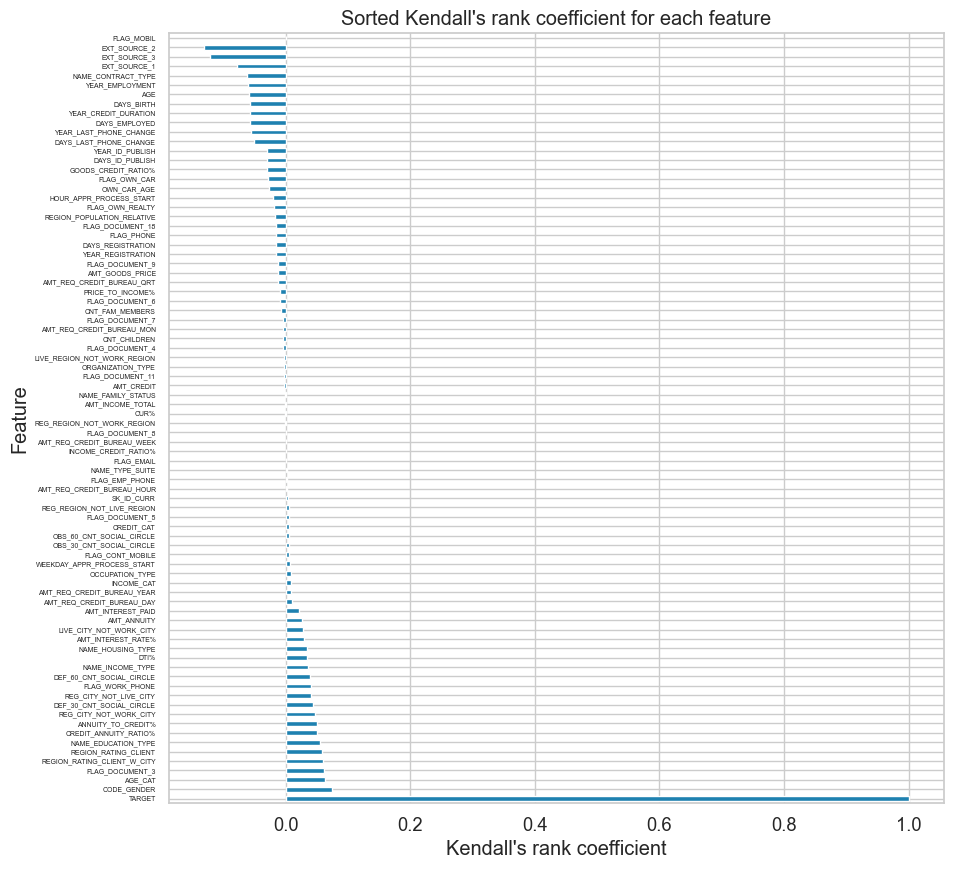

In [79]:
# Visualize the results (optional)
plt.figure(figsize=(10, 10))
sorted_kendall_correlations.plot(kind='barh')
plt.title("Sorted Kendall's rank coefficient for each feature")
plt.xlabel("Kendall's rank coefficient")
plt.ylabel("Feature")
plt.yticks(fontsize=5)
plt.show();

In [80]:
# Separate positive and negative correlations
positive_correlations = kendall_correlations[kendall_correlations > 0]
negative_correlations = kendall_correlations[kendall_correlations < 0]

# Calculate the mean for positive and negative correlations
feat_positive = positive_correlations.quantile(0.7)
feat_negative = negative_correlations.quantile(0.1)

# Display the means
print("Mean Positive Correlations:", feat_positive)
print("Mean Negative Correlations:", feat_negative)

positive_features_flt = kendall_correlations[kendall_correlations > feat_positive]
negative_features_flt = kendall_correlations[kendall_correlations < feat_negative]

Mean Positive Correlations: 0.0405728202612073
Mean Negative Correlations: -0.0607682852884663


In [81]:
positive_features_flt
negative_features_flt

CODE_GENDER                    0.07469826948777379
NAME_EDUCATION_TYPE            0.05556778586643064
REGION_RATING_CLIENT           0.05807805390245022
REGION_RATING_CLIENT_W_CITY      0.059994369435771
REG_CITY_NOT_LIVE_CITY         0.04100799198098728
REG_CITY_NOT_WORK_CITY         0.04655668706853046
DEF_30_CNT_SOCIAL_CIRCLE       0.04336570958879371
FLAG_DOCUMENT_3               0.061375818313326495
AGE_CAT                        0.06297790356191409
ANNUITY_TO_CREDIT%            0.049750779064409355
CREDIT_ANNUITY_RATIO%         0.049750779064409355
TARGET                          0.9999999999999999
dtype: float64

NAME_CONTRACT_TYPE   -0.06240437456336633
EXT_SOURCE_1         -0.07863126145434293
EXT_SOURCE_2         -0.13082682116638067
EXT_SOURCE_3         -0.12074324610806517
dtype: float64

In [82]:
# Concatenate the results into a new DataFrame
features_kendall = pd.concat([positive_features_flt, negative_features_flt], axis=0)

# Display the concatenated results
print("\nConcatenated Results:")
features_kendall = features_kendall.reset_index()
features_kendall.rename(columns={'index':'features', 0:'scores'}, inplace=True)
features_kendall = features_kendall['features'].tolist()
features_kendall


Concatenated Results:


['CODE_GENDER',
 'NAME_EDUCATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_3',
 'AGE_CAT',
 'ANNUITY_TO_CREDIT%',
 'CREDIT_ANNUITY_RATIO%',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3']

### Scorecard

In [83]:
#============================================#
#            import dependencies             #
#============================================#

from monotonic_binning.monotonic_woe_binning import Binning
from optbinning import OptimalBinning
from optbinning import BinningProcess

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

from optbinning import Scorecard
from optbinning.scorecard import plot_auc_roc, plot_cap, plot_ks

import optbinning as opt
from optbinning import Scorecard

(CVXPY) Jan 29 10:12:40 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jan 29 10:12:40 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


In [84]:
list_column_raw = features_kendall
drop_column_bin = ['SK_ID_CURR', 'TARGET']

list_column = [i for i in list_column_raw if i not in drop_column_bin]

x_bin = dc[list_column]
y_bin = dc.TARGET

In [85]:
#Start Binning for WoE
binning_fit_params = dict.fromkeys(list_column, {'monotonic_trend': 'auto_asc_desc',\
                                                  'min_n_bins':2, 'max_n_bins':10})  #value bin itu min=2, max=10

# 2) Instantiate class and fit to train dataset
binning_process    = BinningProcess(list_column, binning_fit_params=binning_fit_params)
binning_process.fit(x_bin, y_bin)

appended_data = []
for i in list_column:
    optb = binning_process.get_binned_variable(i)


    # 4) To visualize the results table and plot
    # store DataFrame in list
    data = optb.binning_table.build()
    data['features'] = i
    appended_data.append(data)
appended_data = pd.concat(appended_data)

features = binning_process.summary()[binning_process.summary()['selected'] == True]['name'].tolist()
woe = appended_data.copy()

woe['% of Event']     = np.maximum(woe['Event'], 0.5) / y_bin[y_bin == 1].shape[0]  # risk
woe['% of Non-event'] = np.maximum(woe['Non-event'], 0.5) / y_bin[y_bin == 0].shape[0] # non risk

# Transform Binning Value to WoE
# 3) To perform the binning of a dataset
data_transform = binning_process.transform(x_bin, metric='woe')
data_transform['TARGET'] = dc['TARGET'].copy()

# Nilai IV merupakan nilai sum dari IV setiap bin
summary_woe_iv = binning_process.summary()
woe_iv_sort = summary_woe_iv.sort_values('iv', ascending = False)
woe_qs_sort = summary_woe_iv.sort_values('quality_score', ascending = False)

# Tabulasi WOE berdasarkan iv
woe_iv_sort.head(10) # syntax display tabel WOE berdasarkan yang terbesar

BinningProcess(binning_fit_params={'AGE_CAT': {'max_n_bins': 10,
                                               'min_n_bins': 2,
                                               'monotonic_trend': 'auto_asc_desc'},
                                   'ANNUITY_TO_CREDIT%': {'max_n_bins': 10,
                                                          'min_n_bins': 2,
                                                          'monotonic_trend': 'auto_asc_desc'},
                                   'CODE_GENDER': {'max_n_bins': 10,
                                                   'min_n_bins': 2,
                                                   'monotonic_trend': 'auto_asc_desc'},
                                   'CREDIT_ANNUITY_RATIO%': {'max_n_bins': 10,
                                                             'min_n_bins': 2,
                                                             'monotonic_tr...
                                                              'monotonic_trend': 'auto_asc_desc'}},
               variable_names=['CODE_GENDER', 'NAME_EDUCATION_TYPE',
                               'REGION_RATING_CLIENT',
                               'REGION_RATING_CLIENT_W_CITY',
                               'REG_CITY_NOT_LIVE_CITY',
                               'REG_CITY_NOT_WORK_CITY',
                               'DEF_30_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_3',
                               'AGE_CAT', 'ANNUITY_TO_CREDIT%',
                               'CREDIT_ANNUITY_RATIO%', 'NAME_CONTRACT_TYPE',
                               'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'])

name      dtype   status  selected n_bins                   iv                   js                gini        quality_score
13           EXT_SOURCE_2  numerical  OPTIMAL      True      9  0.31790495274094716  0.03835031733329327 0.30748851657453113   0.6927742605550956
14           EXT_SOURCE_3  numerical  OPTIMAL      True      9  0.29739971053228537  0.03570993672542302 0.28175183554881433  0.15521019718813225
12           EXT_SOURCE_1  numerical  OPTIMAL      True      6   0.1903114759871639  0.02273372663374035 0.18289062842528736  0.31722015940659487
9      ANNUITY_TO_CREDIT%  numerical  OPTIMAL      True      5   0.0820115253890653 0.010162125854620027 0.14689192363105807 0.024544438050993215
10  CREDIT_ANNUITY_RATIO%  numerical  OPTIMAL      True      5   0.0820115253890653 0.010162125854620027 0.14689192363105807 0.024544438050993215
0             CODE_GENDER  numerical  OPTIMAL      True      2  0.05520268653957035 0.006871020870289155 0.10643792840291366  0.11397635788787024
8                 AGE_CAT  numerical  OPTIMAL      True      4  0.05498668293367742 0.006841659194761627 0.12578634978984016  0.19283566280399822
1     NAME_EDUCATION_TYPE  numerical  OPTIMAL      True      2 0.054540101411982025 0.006760421492076306  0.0899324044432932  0.10323603311397446
11     NAME_CONTRACT_TYPE  numerical  OPTIMAL      True      2  0.04901913182825946 0.006076201024782946 0.08279019071214089  0.08791636193307559
7         FLAG_DOCUMENT_3  numerical  OPTIMAL      True      2  0.04500293917764863  0.00559925582259076  0.0904240986857997  0.09965856734072814

optbinning.binning.binning_statistics.BinningTable

Bin  Count            Count (%)  Non-event  Event           Event rate                   WoE                     IV                     JS
0       (-inf, 0.18)   1446  0.05624927062667756       1062    384  0.26556016597510373   -1.1465639213066718    0.11339814718690956   0.013446036644031913
1       [0.18, 0.31)   2576  0.10020616952581009       2167    409  0.15877329192546583   -0.4964467250272717    0.02999406441717521    0.00371122467720501
2       [0.31, 0.36)   1286  0.05002528494184463       1123    163  0.12674961119751166  -0.23382181658914813  0.0029997898297844435 0.00037412185679155897
3       [0.36, 0.45)   2692  0.10471855914731396       2402    290  0.10772659732540862  -0.04965449086141982 0.00026332699628161903  3.291249343775177e-05
4       [0.45, 0.54)   8844  0.34403080872913994       7914    930  0.10515603799185888 -0.022626534722760994 0.00017771867131625025  2.221436004714184e-05
5       [0.54, 0.66)   4199  0.16334072431633406       3929    270  0.06430102405334603    0.5138876900392559   0.035186474373194485   0.004350543252696874
6       [0.66, 0.71)   2027  0.07885011864472712       1920    107  0.05278737049827331     0.723421060039092   0.031017169157927585  0.0037947541359016883
7       [0.71, 0.76)   1296  0.05041428404714669       1241     55  0.04243827160493827    0.9525090294513072    0.03148827954263544  0.0037936790524129163
8        [0.76, inf)   1341 0.052164780021005955       1300     41 0.030574198359433258    1.2927169062244914   0.052874740357060794    0.00618445025289816
9            Special      0                  0.0          0      0                  0.0                   0.0                    0.0                    0.0
10           Missing      0                  0.0          0      0                  0.0                   0.0                    0.0                    0.0
Totals                25707                  1.0      23058   2649  0.10304586299451511                          0.29739971053228537    0.03570993672542302

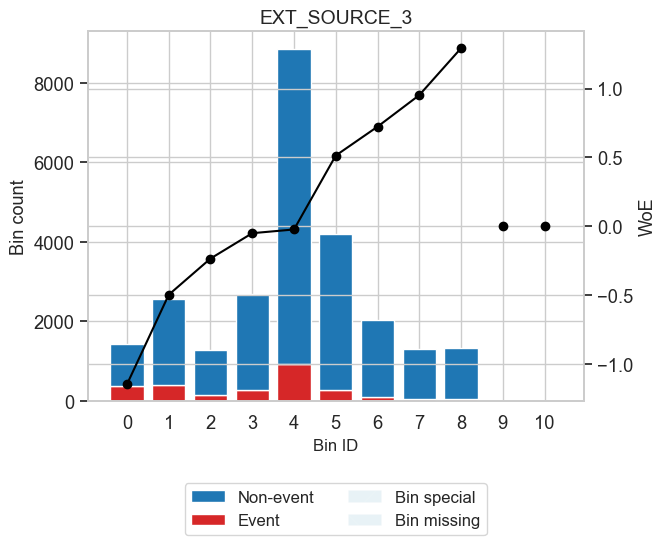

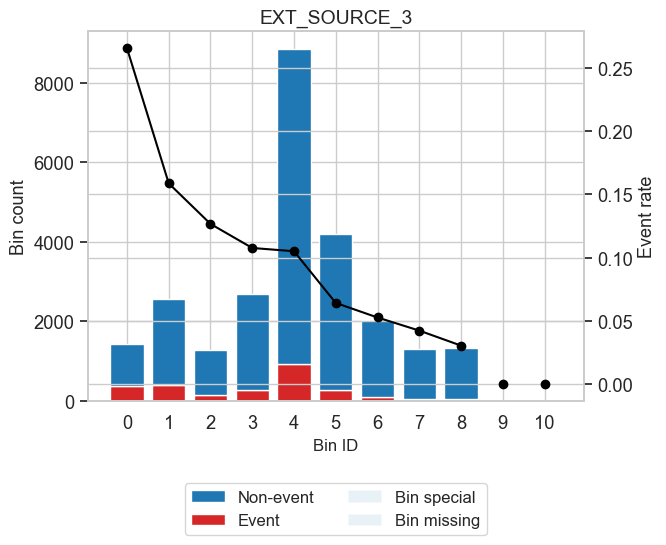

13                  14                  12                   9                      10                   0                    8                    1                    11                  7                            3                     2                       5   \
name                 EXT_SOURCE_2        EXT_SOURCE_3        EXT_SOURCE_1   ANNUITY_TO_CREDIT%  CREDIT_ANNUITY_RATIO%          CODE_GENDER              AGE_CAT  NAME_EDUCATION_TYPE   NAME_CONTRACT_TYPE     FLAG_DOCUMENT_3  REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT  REG_CITY_NOT_WORK_CITY   
dtype                   numerical           numerical           numerical            numerical              numerical            numerical            numerical            numerical            numerical           numerical                    numerical             numerical               numerical   
status                    OPTIMAL             OPTIMAL             OPTIMAL              OPTIMAL                OPTIMAL              OPTIMAL              OPTIMAL              OPTIMAL              OPTIMAL             OPTIMAL                      OPTIMAL               OPTIMAL                 OPTIMAL   
selected                     True                True                True                 True                   True                 True                 True                 True                 True                True                         True                  True                    True   
n_bins                          9                   9                   6                    5                      5                    2                    4                    2                    2                   2                            3                     3                       2   
iv            0.31790495274094716 0.29739971053228537  0.1903114759871639   0.0820115253890653     0.0820115253890653  0.05520268653957035  0.05498668293367742 0.054540101411982025  0.04901913182825946 0.04500293917764863          0.03942323630284124  0.038155481356071344     0.02239515511031835   
js            0.03835031733329327 0.03570993672542302 0.02273372663374035 0.010162125854620027   0.010162125854620027 0.006871020870289155 0.006841659194761627 0.006760421492076306 0.006076201024782946 0.00559925582259076          0.00489206402394592  0.004729987602637301   0.0027953148324788915   
gini          0.30748851657453113 0.28175183554881433 0.18289062842528736  0.14689192363105807    0.14689192363105807  0.10643792840291366  0.12578634978984016   0.0899324044432932  0.08279019071214089  0.0904240986857997          0.08303007031262044   0.08131047476547482     0.06999798725101813   
quality_score  0.6927742605550956 0.15521019718813225 0.31722015940659487 0.024544438050993215   0.024544438050993215  0.11397635788787024  0.19283566280399822  0.10323603311397446  0.08791636193307559 0.09965856734072814          0.07233042528860523   0.07166140272058548     0.05190076268930682   

                                     6                       4   
name           DEF_30_CNT_SOCIAL_CIRCLE  REG_CITY_NOT_LIVE_CITY  
dtype                         numerical               numerical  
status                          OPTIMAL                 OPTIMAL  
selected                           True                    True  
n_bins                                2                       2  
iv                  0.01782059760150927     0.01620390131493102  
js                0.0022187759085928113   0.0020170163813705167  
gini               0.046188414326096994    0.041890227676388836  
quality_score      0.021190076754288033     0.01734810633050436

In [86]:
binning_table = optb.binning_table
type(binning_table)

binning_table.build()
binning_table.plot(metric="woe")

binning_table.plot(metric="event_rate")
woe_iv_sort.T

In [87]:
# Event rate / WoE transformation

x_transform_woe = binning_process.transform(x_bin, metric='woe')
x_transform_event_rate = binning_process.transform(x_bin, metric="event_rate")
x_transform_indices = binning_process.transform(x_bin, metric="indices")
x_transform_bins = binning_process.transform(x_bin, metric="bins")

In [88]:
from optbinning import Scorecard, BinningProcess
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, KFold

# 1) Seleksi Fitur & Test Training Split

X = dc.drop(columns=['TARGET'])
y = dc['TARGET']

# data_transform = binning_process.transform(x_bin, metric='woe')
# data_transform['Risk_Flag'] = df_sample['Risk_Flag'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
# 2) LogisticRegression

lr_model = LogisticRegression(solver='lbfgs', C=1)  #logisticRegression

kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)  #kfold
model = lr_model

scoring =['accuracy','precision','recall','f1','roc_auc']                    #kfold score
scores = model_selection.cross_validate(model, X_train, y_train, cv=kfold,
                                      scoring=scoring, return_train_score=False)


In [90]:
# 3) Feature importance

scores_df = pd.DataFrame(scores)
scores_df
scores_df.to_csv('kfold_credit_all_filtered.csv')

model.fit(X_train, y_train)

importance = model.coef_[0]
dict_importance = {'Feature':list(X_train.columns),'Coefficient':importance}
df_importance = pd.DataFrame(dict_importance)
df_importance = df_importance.sort_values('Coefficient', ascending=False)

fit_time           score_time      test_accuracy  test_precision  test_recall  test_f1       test_roc_auc
0 0.22687315940856934 0.013653039932250977 0.8938888888888888             0.0          0.0      0.0  0.585056569883411
1 0.17408204078674316 0.013125896453857422 0.9011111111111111             0.0          0.0      0.0 0.6063190124551463
2  0.1666851043701172 0.013206958770751953 0.8877777777777778             0.0          0.0      0.0 0.5611748596636885
3 0.16933608055114746 0.013954877853393555 0.8988888888888888             0.0          0.0      0.0  0.614600171151469
4 0.16493701934814453 0.014718055725097656 0.9016120066703724             0.0          0.0      0.0 0.5953172131775656
5 0.18877005577087402 0.013355016708374023 0.8899388549193996             0.0          0.0      0.0 0.5924926971148083
6 0.17876291275024414  0.02132391929626465 0.8921623123957755             0.0          0.0      0.0 0.5930532806628769
7 0.17992186546325684 0.013311386108398438 0.9077265147304058             0.0          0.0      0.0 0.6292506215923092
8 0.17254090309143066 0.013193130493164062 0.9021678710394664             0.0          0.0      0.0 0.5981137623928752
9 0.17668414115905762 0.013195991516113281 0.8977209560867149             0.0          0.0      0.0 0.5862128146453089

LogisticRegression(C=1)

In [91]:
df_importance

Feature             Coefficient
8                   AMT_ANNUITY  1.5303548371589717e-05
78            AMT_INTEREST_PAID  2.7654564565157906e-06
7                    AMT_CREDIT   8.475570441775019e-07
12          NAME_EDUCATION_TYPE  2.2648541057109522e-07
2                   CODE_GENDER   1.410125118212887e-07
62   AMT_REQ_CREDIT_BUREAU_YEAR  1.1247384911986822e-07
48              FLAG_DOCUMENT_3   8.107662023117558e-08
11             NAME_INCOME_TYPE   6.960299234705756e-08
23              FLAG_WORK_PHONE   6.936515356830548e-08
44     DEF_30_CNT_SOCIAL_CIRCLE   6.927998701442675e-08
46     DEF_60_CNT_SOCIAL_CIRCLE   5.958667416539235e-08
37       REG_CITY_NOT_WORK_CITY   5.797569607765988e-08
38      LIVE_CITY_NOT_WORK_CITY  4.3337774587144685e-08
36       REG_CITY_NOT_LIVE_CITY  2.4499406674906744e-08
65            YEAR_REGISTRATION   2.215517218327322e-08
58    AMT_REQ_CREDIT_BUREAU_DAY    6.42142002022123e-09
57   AMT_REQ_CREDIT_BUREAU_HOUR     2.6425421920439e-09
60    AMT_REQ_CREDIT_BUREAU_MON   2.640740099043256e-09
61    AMT_REQ_CREDIT_BUREAU_QRT  1.8650299984762387e-09
50              FLAG_DOCUMENT_5  1.5740122062132901e-09
59   AMT_REQ_CREDIT_BUREAU_WEEK   2.694978185773735e-10
49              FLAG_DOCUMENT_4 -1.8671204352937144e-10
52              FLAG_DOCUMENT_7  -2.693002528996084e-10
55             FLAG_DOCUMENT_11  -7.054923438219643e-10
51              FLAG_DOCUMENT_6  -1.672447273754253e-09
33   REG_REGION_NOT_LIVE_REGION -2.0387221345734117e-09
15   REGION_POPULATION_RELATIVE -2.0663707371770416e-09
54              FLAG_DOCUMENT_9 -3.8855429332596634e-09
70                   CREDIT_CAT -4.5790271030672316e-09
53              FLAG_DOCUMENT_8  -5.232282826835699e-09
35  LIVE_REGION_NOT_WORK_REGION  -5.334695142307996e-09
34   REG_REGION_NOT_WORK_REGION   -9.17094537682979e-09
14            NAME_HOUSING_TYPE  -1.045807796050042e-08
56             FLAG_DOCUMENT_18 -1.0994787901721573e-08
26                   FLAG_EMAIL -1.3073676418035905e-08
25                   FLAG_PHONE -1.3074490714052855e-08
30  REGION_RATING_CLIENT_W_CITY -2.9351876531824767e-08
29         REGION_RATING_CLIENT  -3.227332155492837e-08
3                  FLAG_OWN_CAR  -4.348097157107067e-08
43     OBS_30_CNT_SOCIAL_CIRCLE  -4.714319614441617e-08
45     OBS_60_CNT_SOCIAL_CIRCLE  -4.905050418105799e-08
4               FLAG_OWN_REALTY  -4.968868743043512e-08
66              YEAR_ID_PUBLISH  -4.976098911564268e-08
31   WEEKDAY_APPR_PROCESS_START -5.3347488163134533e-08
24             FLAG_CONT_MOBILE -5.8621455518914355e-08
22               FLAG_EMP_PHONE  -5.977573507780459e-08
21                   FLAG_MOBIL  -5.983370685346506e-08
40                 EXT_SOURCE_1  -6.483578147466555e-08
5                  CNT_CHILDREN  -9.047322226672982e-08
13           NAME_FAMILY_STATUS  -9.793602128354183e-08
1            NAME_CONTRACT_TYPE  -1.149434763668222e-07
20                  OWN_CAR_AGE -1.2604054427070728e-07
42                 EXT_SOURCE_3  -1.419784716255027e-07
79           AMT_INTEREST_RATE% -1.5537962385186732e-07
72                         CUR% -1.5730687360894526e-07
41                 EXT_SOURCE_2 -1.6883932969182607e-07
28              CNT_FAM_MEMBERS -2.0681721855546596e-07
69                   INCOME_CAT -2.0787335100889025e-07
63                          AGE -2.1249598287602777e-07
10              NAME_TYPE_SUITE  -2.550660911109241e-07
67       YEAR_LAST_PHONE_CHANGE -3.6489908805947724e-07
68                      AGE_CAT -3.7485713847675975e-07
64              YEAR_EMPLOYMENT -4.3764539500232953e-07
76        CREDIT_ANNUITY_RATIO%  -4.655341321935701e-07
74           ANNUITY_TO_CREDIT%  -4.655341321935701e-07
27              OCCUPATION_TYPE  -4.975536558907904e-07
0                    SK_ID_CURR -1.0151312384783363e-06
71                         DTI% -1.1258509438280869e-06
32      HOUR_APPR_PROCESS_START -1.1580934682052746e-06
80         YEAR_CREDIT_DURATION -1.2693936359239532e-06
6              AMT_INCOME_TOTAL -1.7227800105520

In [92]:
# Scores KFold CSV / Cross Validation

scores_df

fit_time           score_time      test_accuracy  test_precision  test_recall  test_f1       test_roc_auc
0 0.22687315940856934 0.013653039932250977 0.8938888888888888             0.0          0.0      0.0  0.585056569883411
1 0.17408204078674316 0.013125896453857422 0.9011111111111111             0.0          0.0      0.0 0.6063190124551463
2  0.1666851043701172 0.013206958770751953 0.8877777777777778             0.0          0.0      0.0 0.5611748596636885
3 0.16933608055114746 0.013954877853393555 0.8988888888888888             0.0          0.0      0.0  0.614600171151469
4 0.16493701934814453 0.014718055725097656 0.9016120066703724             0.0          0.0      0.0 0.5953172131775656
5 0.18877005577087402 0.013355016708374023 0.8899388549193996             0.0          0.0      0.0 0.5924926971148083
6 0.17876291275024414  0.02132391929626465 0.8921623123957755             0.0          0.0      0.0 0.5930532806628769
7 0.17992186546325684 0.013311386108398438 0.9077265147304058             0.0          0.0      0.0 0.6292506215923092
8 0.17254090309143066 0.013193130493164062 0.9021678710394664             0.0          0.0      0.0 0.5981137623928752
9 0.17668414115905762 0.013195991516113281 0.8977209560867149             0.0          0.0      0.0 0.5862128146453089

In [93]:
kfold = pd.read_csv('kfold_credit_all_filtered.csv')
kfoldkfold = pd.read_csv('kfold_credit_all_filtered.csv')
kfold

Unnamed: 0           fit_time         score_time      test_accuracy  test_precision  test_recall  test_f1       test_roc_auc
0           0 0.2268731594085693 0.0136530399322509 0.8938888888888888             0.0          0.0      0.0  0.585056569883411
1           1 0.1740820407867431 0.0131258964538574 0.9011111111111112             0.0          0.0      0.0 0.6063190124551463
2           2 0.1666851043701172 0.0132069587707519 0.8877777777777778             0.0          0.0      0.0 0.5611748596636885
3           3 0.1693360805511474 0.0139548778533935 0.8988888888888888             0.0          0.0      0.0  0.614600171151469
4           4 0.1649370193481445 0.0147180557250976 0.9016120066703724             0.0          0.0      0.0 0.5953172131775656
5           5  0.188770055770874  0.013355016708374 0.8899388549193996             0.0          0.0      0.0 0.5924926971148083
6           6 0.1787629127502441 0.0213239192962646 0.8921623123957755             0.0          0.0      0.0 0.5930532806628769
7           7 0.1799218654632568 0.0133113861083984 0.9077265147304058             0.0          0.0      0.0 0.6292506215923092
8           8 0.1725409030914306  0.013193130493164 0.9021678710394664             0.0          0.0      0.0 0.5981137623928752
9           9 0.1766841411590576 0.0131959915161132 0.8977209560867149             0.0          0.0      0.0 0.5862128146453089

In [94]:
pd.set_option('display.max_rows', None)

lr_model = LogisticRegression(solver='lbfgs', C=1)  # Large-scale Bound-constrained Optimization http://users.iems.northwestern.edu/~nocedal/lbfgsb.html

scorecard = Scorecard(binning_process=binning_process,
                      estimator=lr_model, scaling_method="min_max",
                      scaling_method_params={"min": 0, "max": 800})
scorecard.fit(x_bin, y_bin)

scorecard = scorecard.table()
scorecard = scorecard.sort_values(by=['Variable', 'Points'], ascending=[True, False])

scorecard = scorecard[~scorecard['Bin'].isin(['Special', 'Missing'])]

scorecard

Scorecard(binning_process=BinningProcess(binning_fit_params={'AGE_CAT': {'max_n_bins': 10,
                                                                         'min_n_bins': 2,
                                                                         'monotonic_trend': 'auto_asc_desc'},
                                                             'ANNUITY_TO_CREDIT%': {'max_n_bins': 10,
                                                                                    'min_n_bins': 2,
                                                                                    'monotonic_trend': 'auto_asc_desc'},
                                                             'CODE_GENDER': {'max_n_bins': 10,
                                                                             'min_n_bins': 2,
                                                                             'monotonic_trend': 'auto_asc_desc'},
                                                             'CREDIT_ANNUITY_RATIO%': {'max_n_bins': 10,
                                                                                       'm...
                                                         'REGION_RATING_CLIENT',
                                                         'REGION_RATING_CLIENT_W_CITY',
                                                         'REG_CITY_NOT_LIVE_CITY',
                                                         'REG_CITY_NOT_WORK_CITY',
                                                         'DEF_30_CNT_SOCIAL_CIRCLE',
                                                         'FLAG_DOCUMENT_3',
                                                         'AGE_CAT',
                                                         'ANNUITY_TO_CREDIT%',
                                                         'CREDIT_ANNUITY_RATIO%',
                                                         'NAME_CONTRACT_TYPE',
                                                         'EXT_SOURCE_1',
                                                         'EXT_SOURCE_2',
                                                         'EXT_SOURCE_3']),
          estimator=LogisticRegression(C=1), scaling_method='min_max',
          scaling_method_params={'max': 800, 'min': 0})

Variable           Bin              Points
0                      AGE_CAT  (-inf, 0.50)   30.42704773705491
1                      AGE_CAT  [0.50, 2.50)  27.500841563657765
2                      AGE_CAT  [2.50, 3.50)   22.91111337764535
3                      AGE_CAT   [3.50, inf)  20.396038363530266
0           ANNUITY_TO_CREDIT%  (-inf, 4.45)    43.9271994669117
1           ANNUITY_TO_CREDIT%  [4.45, 5.09)   29.55932162170747
2           ANNUITY_TO_CREDIT%  [5.09, 5.22)  28.562825540265514
3           ANNUITY_TO_CREDIT%  [5.22, 6.67)  16.484557538919567
4           ANNUITY_TO_CREDIT%   [6.67, inf)  15.750584947752708
0                  CODE_GENDER  (-inf, 0.50)  33.738526254362824
1                  CODE_GENDER   [0.50, inf)  0.5182292130261636
0        CREDIT_ANNUITY_RATIO%  (-inf, 4.45)    43.9271994669117
1        CREDIT_ANNUITY_RATIO%  [4.45, 5.09)   29.55932162170747
2        CREDIT_ANNUITY_RATIO%  [5.09, 5.22)  28.562825540265514
3        CREDIT_ANNUITY_RATIO%  [5.22, 6.67)  16.484557538919567
4        CREDIT_ANNUITY_RATIO%   [6.67, inf)  15.750584947752708
0     DEF_30_CNT_SOCIAL_CIRCLE  (-inf, 0.50)   28.45189884281192
1     DEF_30_CNT_SOCIAL_CIRCLE   [0.50, inf) -2.9124682174863032
5                 EXT_SOURCE_1   [0.70, inf)  115.56304325276484
4                 EXT_SOURCE_1  [0.58, 0.70)   83.89564929272974
3                 EXT_SOURCE_1  [0.51, 0.58)   71.81909118145107
2                 EXT_SOURCE_1  [0.31, 0.51)   19.42065385452821
1                 EXT_SOURCE_1  [0.20, 0.31)   4.442484962870893
0                 EXT_SOURCE_1  (-inf, 0.20) -20.611568435620296
8                 EXT_SOURCE_2   [0.70, inf)  111.21369250169114
7                 EXT_SOURCE_2  [0.66, 0.70)   86.13373349300257
6                 EXT_SOURCE_2  [0.62, 0.66)    68.3955793133268
5                 EXT_SOURCE_2  [0.53, 0.62)   44.97489268317187
4                 EXT_SOURCE_2  [0.45, 0.53)   28.08581013547458
3                 EXT_SOURCE_2  [0.38, 0.45)   16.34486831293825
2                 EXT_SOURCE_2  [0.27, 0.38)  1.7181366365056618
1                 EXT_SOURCE_2  [0.11, 0.27) -23.954811761435277
0                 EXT_SOURCE_2  (-inf, 0.11)  -74.17917959739921
8                 EXT_SOURCE_3   [0.76, inf)   146.6971712230684
7                 EXT_SOURCE_3  [0.71, 0.76)  114.42846620327153
6                 EXT_SOURCE_3  [0.66, 0.71)    92.6994804470849
5                 EXT_SOURCE_3  [0.54, 0.66)   72.82524775012575
4                 EXT_SOURCE_3  [0.45, 0.54)  21.936892600980286
3                 EXT_SOURCE_3  [0.36, 0.45)  19.373291921893557
2                 EXT_SOURCE_3  [0.31, 0.36)  1.9050276225487508
1                 EXT_SOURCE_3  [0.18, 0.31)  -23.00493560822895
0                 EXT_SOURCE_3  (-inf, 0.18)  -84.66852856796403
0              FLAG_DOCUMENT_3  (-inf, 0.50)   46.34344306842348
1              FLAG_DOCUMENT_3   [0.50, inf)  17.055545986565527
1           NAME_CONTRACT_TYPE   [0.50, inf)  27.243961185533067
0           NAME_CONTRACT_TYPE  (-inf, 0.50)   23.44045639918121
0          NAME_EDUCATION_TYPE  (-inf, 1.50)   56.36025886866072
1          NAME_EDUCATION_TYPE   [1.50, inf)    16.8946750830651
0         REGION_RATING_CLIENT  (-inf, 1.50)  25.128445019871815
1         REGION_RATING_CLIENT  [1.50, 2.50)  24.174285683250087
2         REGION_RATING_CLIENT   [2.50, inf)  23.506707832470713
0  REGION_RATING_CLIENT_W_CITY  (-inf, 1.50)    39.7212269720604
1  REGION_RATING_CLIENT_W_CITY  [1.50, 2.50)  25.682357072318638
2  REGION_RATING_CLIENT_W_CITY   [2.50, inf)  13.576221888317976
0       REG_CITY_NOT_LIVE_CITY  (-inf, 0.50)   25.33311672145811
1       REG_CITY_NOT_LIVE_CITY   [0.50, inf)  15.231813914728674
0       REG_CITY_NOT_WORK_CITY  (-inf, 0.50)  25.923769418414935
1       REG_CITY_NOT_WORK_CITY   [0.50, inf)  20.250886242078803

## Save Model

In [95]:
# Save the trained model to a file
import joblib

joblib.dump(scorecard, 'scorecard.joblib')

['scorecard.joblib']

In [96]:
features_kendall

['CODE_GENDER',
 'NAME_EDUCATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_3',
 'AGE_CAT',
 'ANNUITY_TO_CREDIT%',
 'CREDIT_ANNUITY_RATIO%',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3']